# **ENERGÍAS**

# Importar librerías

In [4]:
# Instalación de las librerías necesarias
!pip install pycountry-convert

In [5]:
# Importación de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import pycountry_convert as pc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar los datos

In [6]:
df = pd.read_csv('global-data-on-sustainable-energy (1).csv')

In [7]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


# Análisis Exploratorio de los Datos

In [8]:
print(df.shape)  # Ver el tamaño del dataset

(3649, 21)


In [9]:
print(df.info())  # Ver tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [10]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [11]:
df = df.rename(columns={"Renewable-electricity-generating-capacity-per-capita": "RenewableElectricityPerCapita",
                        "Access to electricity (% of population)":"ElecAccess%population",
                        "Access to clean fuels for cooking":"cookingfuelaccess",
                        "Financial flows to developing countries (US $)":"FinancialFlowToDevelop",
                        "Renewable energy share in the total final energy consumption (%)":"Renewable%WFinalEnergy",
                        "Electricity from fossil fuels (TWh)":"FossilFuelElectricity",
                        "Electricity from nuclear (TWh)":"NuclearElectricity",
                        "Electricity from renewables (TWh)":"RenewableElectricity",
                        "Low-carbon electricity (% electricity)":"LowCarbonElec%",
                        "Primary energy consumption per capita (kWh/person)":"PrimaryEnergyconsumppercapita",
                        "Energy intensity level of primary energy (MJ/$2017 PPP GDP)":"EnergyuseperGDP",
                        "Renewables (% equivalent primary energy)":"Renewablesprimary%",
                        "GDP growth (annual %)":"GDPAnnualGrowth",
                        "Density\\n(P/Km2)":"Density (P/Km2)",
                        "Value_co2_emissions_kt_by_country":"CO2Emissions"})

In [12]:
df.columns

Index(['Entity', 'Year', 'ElecAccess%population', 'cookingfuelaccess',
       'RenewableElectricityPerCapita', 'FinancialFlowToDevelop',
       'Renewable%WFinalEnergy', 'FossilFuelElectricity', 'NuclearElectricity',
       'RenewableElectricity', 'LowCarbonElec%',
       'PrimaryEnergyconsumppercapita', 'EnergyuseperGDP', 'CO2Emissions',
       'Renewablesprimary%', 'gdp_growth', 'gdp_per_capita', 'Density (P/Km2)',
       'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

El significado de las variables es:

- **Entity**: País.
- **Year**: Año de los datos.
- **ElecAccess%population**: Porcentaje de la población con acceso a electricidad.
- **cookingfuelaccess**: Porcentaje de la población con acceso a combustibles limpios para cocinar.
- **RenewableElectricityPerCapita**: Electricidad renovable generada per cápita (kWh/persona).
- **FinancialFlowToDevelop**: Flujo financiero hacia el desarrollo de energías renovables (en dólares).
- **Renewable%WFinalEnergy**: Porcentaje de energía renovable en el consumo final de energía.
- **FossilFuelElectricity**: Cantidad de electricidad generada a partir de combustibles fósiles.
- **NuclearElectricity**: Cantidad de electricidad generada a partir de energía nuclear.
- **RenewableElectricity**: Cantidad de electricidad generada a partir de fuentes renovables.
- **LowCarbonElec%**: Porcentaje de electricidad generada con fuentes de bajas emisiones de carbono (renovable + nuclear).
- **PrimaryEnergyconsumppercapita**: Consumo de energía primaria per cápita (probablemente en GJ/persona o MWh/persona).
- **EnergyuseperGDP**: Consumo de energía en relación con el PIB (eficiencia energética de la economía).
- **CO2Emissions**: Emisiones de CO₂ en términos absolutos o per cápita.
- **Renewablesprimary%**: Porcentaje de energías renovables en el consumo de energía primaria.
- **gdp_growth**: Crecimiento del PIB (%).
- **gdp_per_capita**: PIB per cápita (en dólares).
- **Density (P/Km2)**: Densidad de población (personas por km²).
- **Land Area(Km2)**: Superficie terrestre del país (km²).
- **Latitude**: Latitud del país.
- **Longitude**: Longitud del país.


In [13]:
# Comprobamos que no haya duplicados
df.duplicated().sum()

0

In [14]:
# Convertir la columna 'Density (P/Km2)' a numérico
#df['Density (P/Km2)'] = pd.to_numeric(df['Density (P/Km2)'], errors='coerce')

## Valores faltantes:

Veamos los datos faltantes que presenta de primeras el df:

In [15]:
# Contar valores nulos por columna
missing_values = df.isnull().sum()

# Total de filas en el DataFrame
total_rows = df.shape[0]

# Calcular el porcentaje de valores nulos por columna
missing_percentage = (missing_values / total_rows) * 100

# Crear un DataFrame con los valores nulos y su porcentaje
missing_info = pd.DataFrame({
    'valores nulos': missing_values,
    '%': missing_percentage
})

# Mostrar el total de valores faltantes en el dataset
print(f"Total de valores faltantes en el dataset: {missing_values.sum()}\n")

# Mostrar las columnas con valores nulos y su porcentaje
display(missing_info)

Total de valores faltantes en el dataset: 6978



,valores nulos,%
Entity,0,0.000000
Year,0,0.000000
ElecAccess%population,10,0.274048
cookingfuelaccess,169,4.631406
RenewableElectricityPerCapita,931,25.513839
FinancialFlowToDevelop,2089,57.248561
Renewable%WFinalEnergy,194,5.316525
FossilFuelElectricity,21,0.575500
NuclearElectricity,126,3.453001
RenewableElectricity,21,0.575500


Nuestra variable target en principio es `CO2Emissions` , analicemos bien sus valores nulos:

Recordamos que en general por cada `Entity` hay máximo de 21 datos, uno por año en el periodo a analizar. De modo que si para algún país hay 21 datos faltantes es porque no tenemos ningun dato de las emisiones de CO2 de ese país y procederiamos a su eliminación tras no tener medios para imputarlo de otra manera, eliminando así el país de la base de datos.

In [16]:
df[df["CO2Emissions"].isnull()].groupby(["Entity"])["Year"].count().sort_values(ascending = False)

,Year
Entity,
Saint Vincent and the Grenadines,21
Bahamas,21
Saint Kitts and Nevis,21
Egypt,21
Saint Lucia,21
...,...
Greece,1
Grenada,1
Guatemala,1


Mostrar sólo algunos para así ver los que tienen todos los datos faltantes en esta variable.

In [17]:
df[df["CO2Emissions"].isnull()].groupby(["Entity"])["Year"].count().sort_values(ascending = False)[:15]

,Year
Entity,
Saint Vincent and the Grenadines,21
Bahamas,21
Saint Kitts and Nevis,21
Egypt,21
Saint Lucia,21
Gambia,21
Congo,21
Slovakia,21
Turkey,21


In [18]:
# Lista de países a eliminar
countries_to_remove = ['Saint Vincent and the Grenadines', 'Bahamas', 'Saint Kitts and Nevis',
                       'Egypt', 'Saint Lucia', 'Gambia', 'Congo', 'Slovakia', 'Turkey',
                       'Puerto Rico', 'Yemen', 'Kyrgyzstan']

# Filtrar el DataFrame eliminando las filas con los países de la lista
df = df[~df['Entity'].isin(countries_to_remove)]

De los 169 faltantes en esta variable, 157 son del año 2020, decidimos elimnar.

Nos damos cuenta que la mayoría de valores faltantes son del año 2020, así que procedemos a eliminar las instancias de 2020 de todos los países:

In [19]:
faltantes_2020= df[df['CO2Emissions'].isna() & (df['Year'] == 2020)]

display(faltantes_2020)

,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,FinancialFlowToDevelop,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,...,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,Renewablesprimary%,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
20,Afghanistan,2020,97.700000,33.20,9.35,NaN,NaN,0.12,0.0,0.68,...,702.8880,NaN,NaN,NaN,-2.351101,516.747871,60,652230.0,33.939110,67.709953
41,Albania,2020,100.000000,81.30,NaN,NaN,NaN,0.00,0.0,5.31,...,11158.0030,NaN,NaN,NaN,-3.955398,5246.292306,105,28748.0,41.153332,20.168331
62,Algeria,2020,99.804130,99.70,15.64,NaN,NaN,72.01,0.0,0.72,...,14933.8070,NaN,NaN,0.297899,-5.100000,3306.858208,18,2381741.0,28.033886,1.659626
83,Angola,2020,46.890610,50.20,115.43,NaN,NaN,4.49,0.0,12.10,...,3527.1600,NaN,NaN,NaN,-5.399987,1776.166868,26,1246700.0,-11.202692,17.873887
104,Antigua and Barbuda,2020,100.000000,100.00,167.98,NaN,NaN,0.31,0.0,0.02,...,27785.2270,NaN,NaN,NaN,-20.192371,13992.744480,223,443.0,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,Uruguay,2020,100.000000,100.00,1075.17,NaN,NaN,2.40,0.0,11.14,...,17631.4400,NaN,NaN,NaN,-5.858721,15438.411670,20,176215.0,-32.522779,-55.765835
3564,Uzbekistan,2020,100.000000,84.25,60.02,NaN,NaN,50.93,0.0,5.01,...,15860.6090,NaN,NaN,2.523421,1.714771,1750.697113,79,447400.0,41.377491,64.585262
3585,Vanuatu,2020,67.333270,7.60,37.84,NaN,NaN,0.05,0.0,0.02,...,2923.5380,NaN,NaN,NaN,-6.813991,2870.089300,25,12189.0,-15.376706,166.959158
3627,Zambia,2020,44.524475,10.40,138.23,NaN,NaN,2.00,0.0,13.10,...,3099.0830,NaN,NaN,NaN,-2.785055,985.132436,25,752618.0,-13.133897,27.849332


In [20]:
# Eliminar las filas donde el año es 2020
df = df[df['Year'] != 2020]

df[df["CO2Emissions"].isnull()]

,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,FinancialFlowToDevelop,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,...,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,Renewablesprimary%,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
164,Aruba,2017,100.0,NaN,361.61,NaN,6.70,0.79,0.0,0.14,...,51509.810,3.13,NaN,NaN,1.999999,29350.80502,590,179.0,12.521110,-69.968330
165,Aruba,2018,100.0,NaN,359.96,NaN,8.02,0.76,0.0,0.15,...,49515.113,3.07,NaN,NaN,NaN,30253.27936,590,179.0,12.521110,-69.968330
166,Aruba,2019,100.0,NaN,358.39,NaN,7.48,0.77,0.0,0.15,...,51107.844,3.20,NaN,NaN,NaN,NaN,590,179.0,12.521110,-69.968330
416,Bermuda,2017,100.0,NaN,NaN,NaN,0.64,0.00,0.0,0.00,...,49395.460,1.77,NaN,NaN,3.611420,111820.58150,1281,54.0,32.299507,-64.790337
417,Bermuda,2018,100.0,NaN,NaN,NaN,0.67,0.00,0.0,0.00,...,50863.380,1.97,NaN,NaN,-0.432801,113023.18560,1281,54.0,32.299507,-64.790337
418,Bermuda,2019,100.0,NaN,NaN,NaN,0.84,0.00,0.0,0.00,...,50639.293,1.65,NaN,NaN,0.459890,117098.44630,1281,54.0,32.299507,-64.790337
647,Cayman Islands,2017,100.0,NaN,138.30,NaN,0.01,0.65,0.0,0.01,...,46465.980,1.87,NaN,NaN,3.184043,81513.16302,274,264.0,19.329900,81.252400
648,Cayman Islands,2018,100.0,NaN,154.54,NaN,0.01,0.64,0.0,0.01,...,42507.164,1.90,NaN,NaN,4.194341,86059.73922,274,264.0,19.329900,81.252400
649,Cayman Islands,2019,100.0,NaN,170.81,NaN,0.00,0.68,0.0,0.02,...,50531.710,2.06,NaN,NaN,3.817100,91392.64259,274,264.0,19.329900,81.252400
1218,French Guiana,2000,NaN,NaN,702.29,NaN,23.84,0.43,0.0,0.00,...,13692.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,10
cookingfuelaccess,141
RenewableElectricityPerCapita,866
FinancialFlowToDevelop,1768
Renewable%WFinalEnergy,20
FossilFuelElectricity,20
NuclearElectricity,120
RenewableElectricity,20


In [22]:
# Comprobar las filas donde hay valores nulos en las columnas 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude' y 'Longitude'
missing_rows = df[df[['Density (P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']].isnull().any(axis=1)]

# Ver las instancias con valores nulos en estas columnas
display(missing_rows)

,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,FinancialFlowToDevelop,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,...,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,Renewablesprimary%,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1218,French Guiana,2000,NaN,NaN,702.29,NaN,23.84,0.43,0.0,0.0,...,13692.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Filtrar todas las filas donde 'Entity' sea 'French Guiana'
french_guiana_data = df[df['Entity'] == 'French Guiana']

# Imprimir las filas correspondientes
display(french_guiana_data)

,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,FinancialFlowToDevelop,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,...,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,Renewablesprimary%,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1218,French Guiana,2000,NaN,NaN,702.29,NaN,23.84,0.43,0.0,0.0,...,13692.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Solo hay una medida de este país, y la mayoria de sus valores son nulos asi que eliminamos esta instancia

In [24]:
# Eliminar las filas donde 'Entity' sea 'French Guiana'
df = df[df['Entity'] != 'French Guiana']

Eliminamos las variables FinancialFlowToDevelop,Renewablesprimary% por su gran cantidad de valores faltantes.

In [25]:
df = df.drop(columns=["FinancialFlowToDevelop", "Renewablesprimary%"])

In [26]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,9
cookingfuelaccess,140
RenewableElectricityPerCapita,866
Renewable%WFinalEnergy,20
FossilFuelElectricity,20
NuclearElectricity,120
RenewableElectricity,20
LowCarbonElec%,40


Tratamos los nulos de la variable `ElecAccess%population`

In [27]:
columna = 'ElecAccess%population'

# Filtrar las filas donde la columna específica tiene valores nulos
instancias_nulas = df[df[columna].isnull()]

# Imprimir las instancias con valores nulos en esa columna
print(f"Instancias con valores nulos en la columna '{columna}':")
display(instancias_nulas)

Instancias con valores nulos en la columna 'ElecAccess%population':


,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1408,Guinea-Bissau,2000,NaN,1.4,0.00,91.24,0.03,0.0,0.0,0.0,809.85490,11.19,150.000000,5.426987,308.910318,70,36125.0,11.803749,-15.180413
1409,Guinea-Bissau,2001,NaN,1.3,0.00,91.21,0.03,0.0,0.0,0.0,807.33746,11.13,150.000000,2.188907,319.957449,70,36125.0,11.803749,-15.180413
1891,Liberia,2000,NaN,0.7,1.40,90.88,0.20,0.0,0.0,0.0,653.12030,10.09,430.000000,NaN,306.833864,53,111369.0,6.428055,-9.429499
1892,Liberia,2001,NaN,0.6,1.35,90.86,0.20,0.0,0.0,0.0,676.39770,10.25,450.000000,2.920273,306.710252,53,111369.0,6.428055,-9.429499
1893,Liberia,2002,NaN,0.6,1.32,91.14,0.20,0.0,0.0,0.0,650.02580,10.24,449.999988,3.763018,306.473940,53,111369.0,6.428055,-9.429499
1894,Liberia,2003,NaN,0.6,1.30,90.35,0.20,0.0,0.0,0.0,706.21320,15.37,479.999989,-30.145133,243.089577,53,111369.0,6.428055,-9.429499
1895,Liberia,2004,NaN,0.5,1.28,89.56,0.20,0.0,0.0,0.0,756.93256,15.70,560.000002,2.619848,286.064725,53,111369.0,6.428055,-9.429499
1896,Liberia,2005,NaN,0.5,1.24,87.76,0.20,0.0,0.0,0.0,846.99274,15.82,670.000017,5.281212,294.893220,53,111369.0,6.428055,-9.429499
1897,Liberia,2006,NaN,0.5,1.20,87.59,0.20,0.0,0.0,0.0,820.09924,15.19,689.999998,8.043906,336.115674,53,111369.0,6.428055,-9.429499


In [28]:
# Filtrar todas las filas donde 'Entity' sea 'Guinea-Bissaua'
Guinea_Bissau_data = df[df['Entity'] == 'Guinea-Bissau']

# Imprimir las filas correspondientes
display(Guinea_Bissau_data)

,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1408,Guinea-Bissau,2000,NaN,1.4,0.00,91.24,0.03,0.0,0.0,0.0,809.85490,11.19,150.000000,5.426987,308.910318,70,36125.0,11.803749,-15.180413
1409,Guinea-Bissau,2001,NaN,1.3,0.00,91.21,0.03,0.0,0.0,0.0,807.33746,11.13,150.000000,2.188907,319.957449,70,36125.0,11.803749,-15.180413
1410,Guinea-Bissau,2002,1.253706,1.3,0.00,91.04,0.02,0.0,0.0,0.0,806.62470,11.43,150.000006,-0.985178,333.058579,70,36125.0,11.803749,-15.180413
1411,Guinea-Bissau,2003,2.591462,1.2,0.00,89.05,0.02,0.0,0.0,0.0,916.40906,11.79,189.999998,0.568510,372.056195,70,36125.0,11.803749,-15.180413
1412,Guinea-Bissau,2004,3.926333,1.2,0.00,88.55,0.03,0.0,0.0,0.0,926.11926,11.70,200.000003,2.761402,405.075118,70,36125.0,11.803749,-15.180413
1413,Guinea-Bissau,2005,5.260666,1.2,0.00,88.53,0.03,0.0,0.0,0.0,915.81470,11.39,209.999993,4.266099,436.475220,70,36125.0,11.803749,-15.180413
1414,Guinea-Bissau,2006,14.536200,1.2,0.00,88.29,0.03,0.0,0.0,0.0,913.91820,11.32,219.999999,2.309358,430.003940,70,36125.0,11.803749,-15.180413
1415,Guinea-Bissau,2007,7.937601,1.1,0.00,87.90,0.03,0.0,0.0,0.0,946.61170,11.20,230.000004,3.262955,493.721993,70,36125.0,11.803749,-15.180413
1416,Guinea-Bissau,2008,9.285560,1.1,0.00,88.42,0.03,0.0,0.0,0.0,898.46826,10.95,219.999999,3.203567,599.995237,70,36125.0,11.803749,-15.180413
1417,Guinea-Bissau,2009,4.700000,1.1,0.00,87.89,0.03,0.0,0.0,0.0,907.22980,10.80,230.000004,3.368975,559.414571,70,36125.0,11.803749,-15.180413


In [29]:
# Definir los años de interpolación para Guinea-Bissau
years_missing_gb = [2000, 2001]

# Valor conocido en 2002
value_2002 = 1.25

# Generar valores interpolados desde 0% (año 2000) hasta 1.25% (año 2002)
interpolated_values = np.linspace(0, value_2002, len(years_missing_gb) + 1)[:-1]

# Aplicar la interpolación solo para Guinea-Bissau en los años 2000 y 2001
mask = (df["Entity"] == "Guinea-Bissau") & (df["Year"].isin(years_missing_gb))
df.loc[mask, "ElecAccess%population"] = interpolated_values

# Mostrar los datos de Guinea-Bissau para verificar
display(df[df["Entity"] == "Guinea-Bissau"])

,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1408,Guinea-Bissau,2000,0.000000,1.4,0.00,91.24,0.03,0.0,0.0,0.0,809.85490,11.19,150.000000,5.426987,308.910318,70,36125.0,11.803749,-15.180413
1409,Guinea-Bissau,2001,0.625000,1.3,0.00,91.21,0.03,0.0,0.0,0.0,807.33746,11.13,150.000000,2.188907,319.957449,70,36125.0,11.803749,-15.180413
1410,Guinea-Bissau,2002,1.253706,1.3,0.00,91.04,0.02,0.0,0.0,0.0,806.62470,11.43,150.000006,-0.985178,333.058579,70,36125.0,11.803749,-15.180413
1411,Guinea-Bissau,2003,2.591462,1.2,0.00,89.05,0.02,0.0,0.0,0.0,916.40906,11.79,189.999998,0.568510,372.056195,70,36125.0,11.803749,-15.180413
1412,Guinea-Bissau,2004,3.926333,1.2,0.00,88.55,0.03,0.0,0.0,0.0,926.11926,11.70,200.000003,2.761402,405.075118,70,36125.0,11.803749,-15.180413
1413,Guinea-Bissau,2005,5.260666,1.2,0.00,88.53,0.03,0.0,0.0,0.0,915.81470,11.39,209.999993,4.266099,436.475220,70,36125.0,11.803749,-15.180413
1414,Guinea-Bissau,2006,14.536200,1.2,0.00,88.29,0.03,0.0,0.0,0.0,913.91820,11.32,219.999999,2.309358,430.003940,70,36125.0,11.803749,-15.180413
1415,Guinea-Bissau,2007,7.937601,1.1,0.00,87.90,0.03,0.0,0.0,0.0,946.61170,11.20,230.000004,3.262955,493.721993,70,36125.0,11.803749,-15.180413
1416,Guinea-Bissau,2008,9.285560,1.1,0.00,88.42,0.03,0.0,0.0,0.0,898.46826,10.95,219.999999,3.203567,599.995237,70,36125.0,11.803749,-15.180413
1417,Guinea-Bissau,2009,4.700000,1.1,0.00,87.89,0.03,0.0,0.0,0.0,907.22980,10.80,230.000004,3.368975,559.414571,70,36125.0,11.803749,-15.180413


In [30]:
# Filtrar todas las filas donde 'Entity' sea 'French Guiana'
liberia_data = df[df['Entity'] == 'Liberia']

# Imprimir las filas correspondientes
display(liberia_data)

,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1891,Liberia,2000,NaN,0.7,1.40,90.88,0.20,0.0,0.0,0.0,653.12030,10.09,430.000000,NaN,306.833864,53,111369.0,6.428055,-9.429499
1892,Liberia,2001,NaN,0.6,1.35,90.86,0.20,0.0,0.0,0.0,676.39770,10.25,450.000000,2.920273,306.710252,53,111369.0,6.428055,-9.429499
1893,Liberia,2002,NaN,0.6,1.32,91.14,0.20,0.0,0.0,0.0,650.02580,10.24,449.999988,3.763018,306.473940,53,111369.0,6.428055,-9.429499
1894,Liberia,2003,NaN,0.6,1.30,90.35,0.20,0.0,0.0,0.0,706.21320,15.37,479.999989,-30.145133,243.089577,53,111369.0,6.428055,-9.429499
1895,Liberia,2004,NaN,0.5,1.28,89.56,0.20,0.0,0.0,0.0,756.93256,15.70,560.000002,2.619848,286.064725,53,111369.0,6.428055,-9.429499
1896,Liberia,2005,NaN,0.5,1.24,87.76,0.20,0.0,0.0,0.0,846.99274,15.82,670.000017,5.281212,294.893220,53,111369.0,6.428055,-9.429499
1897,Liberia,2006,NaN,0.5,1.20,87.59,0.20,0.0,0.0,0.0,820.09924,15.19,689.999998,8.043906,336.115674,53,111369.0,6.428055,-9.429499
1898,Liberia,2007,3.000000,0.4,1.15,89.83,0.25,0.0,0.0,0.0,728.07930,14.18,639.999986,9.535280,396.601761,53,111369.0,6.428055,-9.429499
1899,Liberia,2008,1.279290,0.4,1.11,91.84,0.25,0.0,0.0,0.0,619.28720,13.47,540.000022,7.145689,478.399540,53,111369.0,6.428055,-9.429499
1900,Liberia,2009,1.900000,0.4,1.07,91.81,0.25,0.0,0.0,0.0,547.74620,13.09,540.000022,5.300539,470.948121,53,111369.0,6.428055,-9.429499


 rellena los valores faltantes de ElecAccess%population en Liberia (años 2000-2006) asumiendo un crecimiento lineal desde 0% en 2000 hasta 3% en 2007:

In [31]:
# Definir los años de interpolación para Liberia
years_missing_liberia = list(range(2000, 2007))  # De 2000 a 2006

# Valor conocido en 2007
value_2007 = 3.0

# Generar valores interpolados desde 0% (en 2000) hasta 3% (en 2007)
interpolated_values = np.linspace(0, value_2007, len(years_missing_liberia) + 1)[:-1]

# Aplicar la interpolación solo para Liberia en los años 2000 a 2006
mask = (df["Entity"] == "Liberia") & (df["Year"].isin(years_missing_liberia))
df.loc[mask, "ElecAccess%population"] = interpolated_values

# Mostrar los datos de Liberia para verificar
display(df[df["Entity"] == "Liberia"])

,Entity,Year,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1891,Liberia,2000,0.000000,0.7,1.40,90.88,0.20,0.0,0.0,0.0,653.12030,10.09,430.000000,NaN,306.833864,53,111369.0,6.428055,-9.429499
1892,Liberia,2001,0.428571,0.6,1.35,90.86,0.20,0.0,0.0,0.0,676.39770,10.25,450.000000,2.920273,306.710252,53,111369.0,6.428055,-9.429499
1893,Liberia,2002,0.857143,0.6,1.32,91.14,0.20,0.0,0.0,0.0,650.02580,10.24,449.999988,3.763018,306.473940,53,111369.0,6.428055,-9.429499
1894,Liberia,2003,1.285714,0.6,1.30,90.35,0.20,0.0,0.0,0.0,706.21320,15.37,479.999989,-30.145133,243.089577,53,111369.0,6.428055,-9.429499
1895,Liberia,2004,1.714286,0.5,1.28,89.56,0.20,0.0,0.0,0.0,756.93256,15.70,560.000002,2.619848,286.064725,53,111369.0,6.428055,-9.429499
1896,Liberia,2005,2.142857,0.5,1.24,87.76,0.20,0.0,0.0,0.0,846.99274,15.82,670.000017,5.281212,294.893220,53,111369.0,6.428055,-9.429499
1897,Liberia,2006,2.571429,0.5,1.20,87.59,0.20,0.0,0.0,0.0,820.09924,15.19,689.999998,8.043906,336.115674,53,111369.0,6.428055,-9.429499
1898,Liberia,2007,3.000000,0.4,1.15,89.83,0.25,0.0,0.0,0.0,728.07930,14.18,639.999986,9.535280,396.601761,53,111369.0,6.428055,-9.429499
1899,Liberia,2008,1.279290,0.4,1.11,91.84,0.25,0.0,0.0,0.0,619.28720,13.47,540.000022,7.145689,478.399540,53,111369.0,6.428055,-9.429499
1900,Liberia,2009,1.900000,0.4,1.07,91.81,0.25,0.0,0.0,0.0,547.74620,13.09,540.000022,5.300539,470.948121,53,111369.0,6.428055,-9.429499


In [32]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,0
cookingfuelaccess,140
RenewableElectricityPerCapita,866
Renewable%WFinalEnergy,20
FossilFuelElectricity,20
NuclearElectricity,120
RenewableElectricity,20
LowCarbonElec%,40


In [33]:
# Seleccionar las columnas relevantes
cols_nulos = [
    "ElecAccess%population", "cookingfuelaccess", "RenewableElectricityPerCapita",
    "Renewable%WFinalEnergy", "FossilFuelElectricity", "NuclearElectricity",
    "RenewableElectricity", "LowCarbonElec%", "EnergyuseperGDP",
    "CO2Emissions", "gdp_growth", "gdp_per_capita"
]

# Filtrar solo las filas con al menos un valor nulo en esas columnas
df_nulos = df[df[cols_nulos].isna().any(axis=1)]

# Contar valores nulos por país y por variable
nulos_por_pais = df_nulos.groupby("Entity")[cols_nulos].apply(lambda x: x.isna().sum())

# Mostrar el resultado
display(nulos_por_pais[:30])

,ElecAccess%population,cookingfuelaccess,RenewableElectricityPerCapita,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita
Entity,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,3,2
Albania,0,0,20,20,0,0,0,0,0,0,0,0
Aruba,0,20,0,0,0,0,0,0,0,3,2,1
Australia,0,0,20,0,0,0,0,0,0,0,0,0
Austria,0,0,20,0,0,0,0,0,0,0,0,0
Belarus,0,0,20,0,0,0,0,0,0,0,0,0
Belgium,0,0,20,0,0,0,0,0,0,0,0,0
Bermuda,0,20,20,0,0,0,0,20,0,3,0,0
Bosnia and Herzegovina,0,0,20,0,0,0,0,0,0,0,0,0


In [34]:
# Calcular la correlación entre RenewableElectricityPerCapita y CO2Emissions
correlation = df[["RenewableElectricityPerCapita", "CO2Emissions"]].corr()
print(correlation)

                               RenewableElectricityPerCapita  CO2Emissions
RenewableElectricityPerCapita                       1.000000      0.046755
CO2Emissions                                        0.046755      1.000000


Procedemos a la eliminación de esta variable tras ver que tiene demasiados nulos y que apenas está correlada con la variable target.

In [35]:
df=df.drop(columns=["RenewableElectricityPerCapita"])

Veamos la matriz de correlación de Pearson, midiendo así la relación lineal entre las variables numéricas del DataFrame:

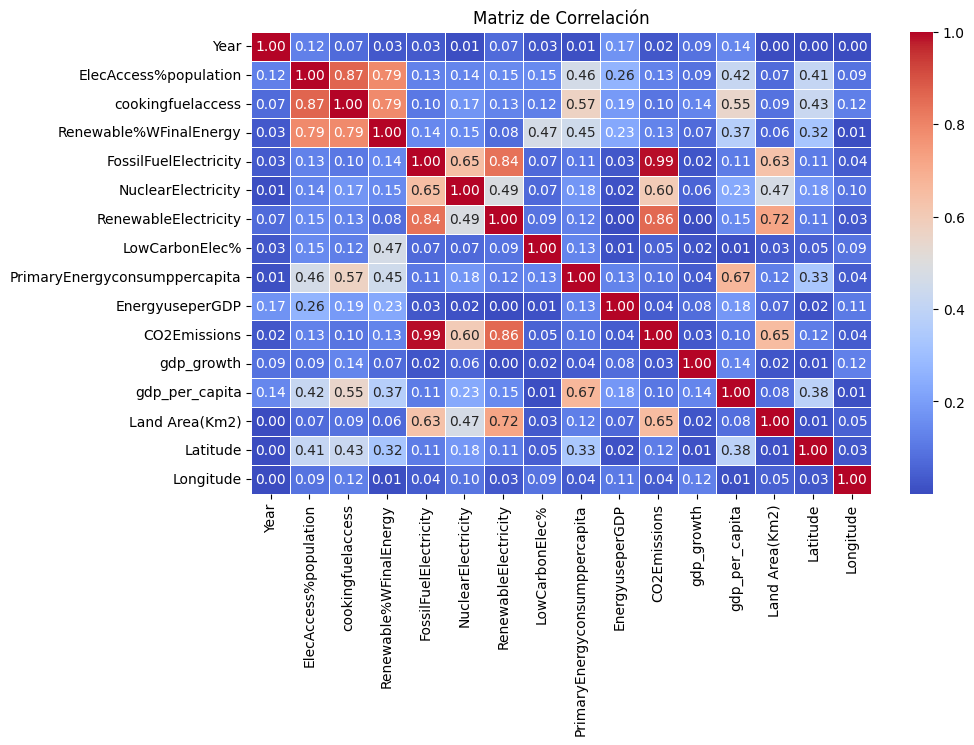

In [36]:
# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True).abs()  # Solo columnas numéricas y la correlación en valor absoluto

# Graficar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Como 'ElecAccess%population' y 'cookingfuelaccess' están muy correladas y esta segunda tiene más valores faltantes y está menos correlada con la target, entonces la eliminamos.

In [37]:
df = df.drop(columns=["cookingfuelaccess"])

In [38]:
# Seleccionar las columnas relevantes
cols_nulos = [
    "ElecAccess%population", "Renewable%WFinalEnergy","FossilFuelElectricity", "NuclearElectricity",
    "RenewableElectricity", "LowCarbonElec%", "EnergyuseperGDP",
    "CO2Emissions", "gdp_growth", "gdp_per_capita"
]

# Filtrar solo las filas con al menos un valor nulo en esas columnas
df_nulos = df[df[cols_nulos].isna().any(axis=1)]

# Contar valores nulos por país y por variable
nulos_por_pais = df_nulos.groupby("Entity")[cols_nulos].apply(lambda x: x.isna().sum())

# Mostrar el resultado
display(nulos_por_pais[:30])

,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita
Entity,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,3,2
Albania,0,20,0,0,0,0,0,0,0,0
Aruba,0,0,0,0,0,0,0,3,2,1
Bermuda,0,0,0,0,0,20,0,3,0,0
Cayman Islands,0,0,0,0,0,0,0,3,7,6
Chile,0,0,0,20,0,0,0,0,0,0
Czechia,0,0,0,0,0,0,0,0,20,20
Djibouti,0,0,0,0,0,0,0,0,14,0
Eritrea,0,0,0,0,0,0,4,0,8,8


Rápidamente nos damos cuenta que los valores nulos de la variable `Renewable%WFinalEnergy` son todos de Albania en todos sus años, analicemos este país.

In [39]:
# Filtramos el DataFrame para obtener solo las filas donde la columna 'Entity' sea 'Albania'
albania_data = df[df['Entity'] == 'Albania']

# Mostramos los primeros registros de los datos de Albania
display(albania_data)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
21,Albania,2000,100.00,NaN,0.14,0.0,4.55,97.014930,9029.4375,4.13,3170.000000,6.946217,1126.683340,105,28748.0,41.153332,20.168331
22,Albania,2001,100.00,NaN,0.13,0.0,3.52,96.438354,8635.5320,3.89,3230.000000,8.293313,1281.659826,105,28748.0,41.153332,20.168331
23,Albania,2002,100.00,NaN,0.16,0.0,3.48,95.604390,9443.5550,4.10,3759.999990,4.536524,1425.124219,105,28748.0,41.153332,20.168331
24,Albania,2003,100.00,NaN,0.10,0.0,5.12,98.084300,10756.6120,3.80,4070.000172,5.528637,1846.120121,105,28748.0,41.153332,20.168331
25,Albania,2004,100.00,NaN,0.13,0.0,5.41,97.653430,11586.9510,3.96,4250.000000,5.514668,2373.581292,105,28748.0,41.153332,20.168331
26,Albania,2005,100.00,NaN,0.07,0.0,5.32,98.701300,11545.6160,3.75,4030.000210,5.526424,2673.786584,105,28748.0,41.153332,20.168331
27,Albania,2006,100.00,NaN,0.09,0.0,4.95,98.214280,10976.7280,3.46,4010.000229,5.902659,2972.742924,105,28748.0,41.153332,20.168331
28,Albania,2007,100.00,NaN,0.07,0.0,2.76,97.526505,9534.8740,3.12,4139.999866,5.983260,3595.038057,105,28748.0,41.153332,20.168331
29,Albania,2008,100.00,NaN,0.07,0.0,3.76,98.172325,10499.3280,3.01,4079.999924,7.500041,4370.539925,105,28748.0,41.153332,20.168331
30,Albania,2009,100.00,NaN,0.00,0.0,5.20,100.000000,11524.4280,2.98,4219.999790,3.354289,4114.134899,105,28748.0,41.153332,20.168331


In [40]:
from sklearn.metrics.pairwise import euclidean_distances

# Seleccionar solo los países con datos completos
df_comparison = df.dropna(subset=["PrimaryEnergyconsumppercapita", "CO2Emissions",
                                  "gdp_per_capita", "Latitude", "Longitude"])

# Extraer los valores de Albania
albania_values = df[df["Entity"] == "Albania"][
    ["PrimaryEnergyconsumppercapita", "CO2Emissions", "gdp_per_capita", "Latitude", "Longitude"]
].mean()

# Eliminar Albania de la comparación
df_comparison = df_comparison[df_comparison["Entity"] != "Albania"]

# Calcular la distancia euclidiana
distances = euclidean_distances(df_comparison[
    ["PrimaryEnergyconsumppercapita", "CO2Emissions", "gdp_per_capita", "Latitude", "Longitude"]
], [albania_values])

# Encontrar el país más cercano
similar_country = df_comparison.iloc[distances.argmin()]["Entity"]
print(f"El país más similar a Albania es: {similar_country}")

# Copiar valores de Armenia a Albania sin modificar el nombre del país
for col in df.columns:
    if col != "Entity":
        df.loc[df["Entity"] == "Albania", col] = df.loc[df["Entity"] == similar_country, col].values

print("Valores de Albania imputados con los de:", similar_country)

# Verificar la imputación
display(df[df["Entity"] == "Albania"])


El país más similar a Albania es: Armenia
Valores de Albania imputados con los de: Armenia


,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
21,Albania,2000,98.900000,7.16,2.53,1.84,1.25,54.982210,9270.454,6.79,3560.000000,5.9,622.740923,104,29743.0,40.069099,45.038189
22,Albania,2001,100.000000,5.42,2.62,1.99,0.96,52.962296,9219.866,6.17,3600.000000,9.6,694.423455,104,29743.0,40.069099,45.038189
23,Albania,2002,98.000000,8.90,1.48,2.09,1.64,71.593090,8911.608,5.10,3119.999886,13.2,783.241215,104,29743.0,40.069099,45.038189
24,Albania,2003,99.190130,9.81,1.43,1.82,1.96,72.552780,9866.072,4.72,3500.000000,14.0,930.125473,104,29743.0,40.069099,45.038189
25,Albania,2004,99.189230,8.71,1.72,2.20,1.98,70.847450,10294.192,4.52,3759.999990,10.5,1191.921006,104,29743.0,40.069099,45.038189
26,Albania,2005,99.800000,6.49,1.72,2.50,1.75,71.189285,11997.367,4.76,4460.000038,13.9,1643.756889,104,29743.0,40.069099,45.038189
27,Albania,2006,99.188230,7.65,1.39,2.42,1.81,75.266910,12061.231,4.28,4489.999771,13.2,2158.148074,104,29743.0,40.069099,45.038189
28,Albania,2007,99.193184,7.02,1.40,2.35,1.83,74.910390,13633.888,4.20,5199.999809,13.7,3139.280710,104,29743.0,40.069099,45.038189
29,Albania,2008,99.205376,6.40,1.42,2.27,1.78,74.040230,13250.285,4.13,5690.000057,6.9,4010.861381,104,29743.0,40.069099,45.038189
30,Albania,2009,99.227500,7.80,1.08,2.29,2.00,79.888270,11915.396,4.18,4510.000229,-14.1,2994.340471,104,29743.0,40.069099,45.038189


In [41]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,0
Renewable%WFinalEnergy,0
FossilFuelElectricity,20
NuclearElectricity,120
RenewableElectricity,20
LowCarbonElec%,40
PrimaryEnergyconsumppercapita,0
EnergyuseperGDP,28


Seguramente en las variables: "RenewableElectricity","FossilFuelElectricity" y "LowCarbonElec%" los nulos provengan del mismo país, de manera que de las dos primeras variables cada una tenga un país con nulos (o incluso el mismo) y de  "LowCarbonElec%"  dos países presenten nulos en todos sus años. Veamos a continuación qué pasa realmente:

In [42]:
# Filtrar filas donde al menos una de las columnas especificadas tiene NaN
df_nulls = df[df[["RenewableElectricity", "LowCarbonElec%", "FossilFuelElectricity"]].isnull().any(axis=1)]

# Mostrar el DataFrame filtrado
display(df_nulls)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
399,Bermuda,2000,100.000000,0.46,0.0,0.0,0.0,NaN,39297.880,1.52,517.047,9.317156,56284.168650,1281,54.0,32.299507,-64.790337
400,Bermuda,2001,100.000000,0.54,0.0,0.0,0.0,NaN,39604.938,1.45,528.048,7.222436,58883.959430,1281,54.0,32.299507,-64.790337
401,Bermuda,2002,100.000000,0.51,0.0,0.0,0.0,NaN,41429.880,1.54,557.384,-1.477791,62583.100200,1281,54.0,32.299507,-64.790337
402,Bermuda,2003,100.000000,0.51,0.0,0.0,0.0,NaN,41114.773,1.50,561.051,3.410707,66111.725230,1281,54.0,32.299507,-64.790337
403,Bermuda,2004,100.000000,0.52,0.0,0.0,0.0,NaN,42390.040,1.51,583.053,2.321267,70359.319110,1281,54.0,32.299507,-64.790337
404,Bermuda,2005,100.000000,0.49,0.0,0.0,0.0,NaN,44480.980,1.48,583.053,1.674206,75882.033860,1281,54.0,32.299507,-64.790337
405,Bermuda,2006,100.000000,0.44,0.0,0.0,0.0,NaN,50145.137,1.56,652.726,5.543866,95221.858870,1281,54.0,32.299507,-64.790337
406,Bermuda,2007,100.000000,0.50,0.0,0.0,0.0,NaN,58163.746,1.67,729.733,3.345140,104287.387500,1281,54.0,32.299507,-64.790337
407,Bermuda,2008,100.000000,0.46,0.0,0.0,0.0,NaN,55556.035,1.51,649.059,-1.865956,106935.486300,1281,54.0,32.299507,-64.790337
408,Bermuda,2009,100.000000,0.43,0.0,0.0,0.0,NaN,43647.020,1.21,476.710,-5.626698,101407.764000,1281,54.0,32.299507,-64.790337


Observamos que Bermuda sólo presenta nulos en la variable LowCarbonElec%

La imputación de un valor NaN con 0 en la columna de FossilFuelElectricity para Bermuda es justificada por el hecho de que, en este país, toda la electricidad proviene de combustibles fósiles importados, específicamente de petróleo y gas. No se genera electricidad a partir de fuentes renovables ni nucleares, por lo que las columnas relacionadas con energías bajas en carbono (como LowCarbonElec%) deben tener un valor de 0%. Esto refleja con precisión que Bermuda no participa en fuentes de energía limpia o baja en carbono.

In [43]:
df.loc[df["Entity"] == "Bermuda", "LowCarbonElec%"] = df.loc[df["Entity"] == "Bermuda", "LowCarbonElec%"].fillna(0)

En cuanto a Tuvalo tenemos que presenta nulos en todos sus años en las variables: FossilFuelElectricity,	NuclearElectricity,	RenewableElectricity y	LowCarbonElec%

Los valores NaN en las variables relacionadas con la generación de electricidad pueden imputarse con 0, dado que Tuvalu no parece generar energía localmente.
El valor 0 de PrimaryEnergyconsumppercapita refleja un consumo extremadamente bajo o la dependencia de fuentes externas, lo cual también puede implicar que NaN en las variables de electricidad reflejan la ausencia de infraestructura local de generación.

In [44]:
df.loc[df["Entity"] == "Tuvalu", "LowCarbonElec%"] = df.loc[df["Entity"] == "Tuvalu", "LowCarbonElec%"].fillna(0)
df.loc[df["Entity"] == "Tuvalu", "FossilFuelElectricity"] = df.loc[df["Entity"] == "Tuvalu", "FossilFuelElectricity"].fillna(0)
df.loc[df["Entity"] == "Tuvalu", "NuclearElectricity"] = df.loc[df["Entity"] == "Tuvalu", "NuclearElectricity"].fillna(0)
df.loc[df["Entity"] == "Tuvalu", "RenewableElectricity"] = df.loc[df["Entity"] == "Tuvalu", "RenewableElectricity"].fillna(0)

In [45]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,0
Renewable%WFinalEnergy,0
FossilFuelElectricity,0
NuclearElectricity,100
RenewableElectricity,0
LowCarbonElec%,0
PrimaryEnergyconsumppercapita,0
EnergyuseperGDP,28


Analicemos ahora los faltantes de `NuclearElectricity`:

In [46]:
# Contar los valores nulos (NaN) por país en la columna 'NuclearElectricity'
null_counts = df.groupby('Entity')['NuclearElectricity'].apply(lambda x: x.isnull().sum()).reset_index()
null_counts.columns = ['Entity', 'Null_Count_NuclearElectricity']

# Filtrar solo los países con valores nulos
null_counts_positive = null_counts[null_counts['Null_Count_NuclearElectricity'] > 0]

# Mostrar el resultado
display(null_counts_positive)

,Entity,Null_Count_NuclearElectricity
32,Chile,20
70,Indonesia,20
78,Kazakhstan,20
91,Malaysia,20
128,Saudi Arabia,20


Los países Chile, Indonesia, Kazakhstan, Malaysia y Saudi Arabia presentan todos sus datos de energía nuclear nulos, analicemos país por país:

In [47]:
# Filtrar los datos de Arabia Saudita del DataFrame
saudi_arabia = df[df['Entity'] == 'Saudi Arabia']

display(saudi_arabia)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
2871,Saudi Arabia,2000,100.00,0.01,138.68,NaN,0.00,0.000000,61950.850,4.73,249660.0000,5.625416,9171.331476,16,2149690.0,23.885942,45.079162
2872,Saudi Arabia,2001,100.00,0.01,146.09,NaN,0.00,0.000000,64399.926,4.91,254090.0000,-1.210744,8684.645762,16,2149690.0,23.885942,45.079162
2873,Saudi Arabia,2002,100.00,0.01,154.91,NaN,0.00,0.000000,65480.074,5.74,272250.0000,-2.819174,8695.396483,16,2149690.0,23.885942,45.079162
2874,Saudi Arabia,2003,100.00,0.01,166.58,NaN,0.00,0.000000,67781.130,5.18,284829.9866,11.242061,9609.968686,16,2149690.0,23.885942,45.079162
2875,Saudi Arabia,2004,100.00,0.01,173.41,NaN,0.00,0.000000,71949.190,4.83,299890.0146,7.958442,11185.137040,16,2149690.0,23.885942,45.079162
2876,Saudi Arabia,2005,100.00,0.01,191.05,NaN,0.00,0.000000,74232.790,4.87,315290.0085,5.573850,13791.454760,16,2149690.0,23.885942,45.079162
2877,Saudi Arabia,2006,100.00,0.01,196.31,NaN,0.00,0.000000,74860.330,5.08,335440.0024,2.788402,15384.738360,16,2149690.0,23.885942,45.079162
2878,Saudi Arabia,2007,100.00,0.01,204.43,NaN,0.00,0.000000,73638.340,5.24,354619.9951,1.847130,16516.631780,16,2149690.0,23.885942,45.079162
2879,Saudi Arabia,2008,100.00,0.01,204.20,NaN,0.00,0.000000,77575.414,5.40,389720.0012,6.249773,20078.260070,16,2149690.0,23.885942,45.079162
2880,Saudi Arabia,2009,100.00,0.01,217.31,NaN,0.00,0.000000,77417.270,5.79,406529.9988,-2.059249,16113.143710,16,2149690.0,23.885942,45.079162


Sabemos que Arabia Saudita se basa principalmente en petróleo y gas natural para su producción de energía, y observando los datos concluimos que esta columna es nula pq son ceros.

In [48]:
df.loc[df["Entity"] == "Saudi Arabia", "NuclearElectricity"] = df.loc[df["Entity"] == "Saudi Arabia", "NuclearElectricity"].fillna(0)

In [49]:
# Filtrar los datos de Indonesia del DataFrame
Indonesia_data = df[df['Entity'] == 'Indonesia']

display(Indonesia_data)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1555,Indonesia,2000,86.30000,45.62,78.43,NaN,19.60,19.993880,5435.4355,5.42,280650.0000,4.920068,780.190205,151,1904569.0,-0.789275,113.921327
1556,Indonesia,2001,86.26000,44.33,83.96,NaN,22.19,20.904380,5740.4346,5.34,302060.0000,3.643466,748.257609,151,1904569.0,-0.789275,113.921327
1557,Indonesia,2002,87.60000,44.66,92.03,NaN,21.00,18.579138,5815.3860,5.30,305640.0146,4.499475,900.177588,151,1904569.0,-0.789275,113.921327
1558,Indonesia,2003,87.94000,43.00,97.57,NaN,19.82,16.883892,6224.9414,5.07,333890.0146,4.780369,1065.648520,151,1904569.0,-0.789275,113.921327
1559,Indonesia,2004,89.01000,41.46,103.80,NaN,20.97,16.806925,6087.6787,5.14,341239.9902,5.030874,1150.261367,151,1904569.0,-0.789275,113.921327
1560,Indonesia,2005,85.03832,41.57,110.22,NaN,22.66,17.052980,6186.4365,4.94,342149.9939,5.692571,1263.287332,151,1904569.0,-0.789275,113.921327
1561,Indonesia,2006,90.62000,40.07,116.80,NaN,21.18,15.350051,6211.2920,4.79,364470.0012,5.500952,1589.801489,151,1904569.0,-0.789275,113.921327
1562,Indonesia,2007,91.10000,40.01,124.10,NaN,24.29,16.369028,6579.2300,4.48,379959.9915,6.345022,1860.002811,151,1904569.0,-0.789275,113.921327
1563,Indonesia,2008,92.73000,41.12,129.55,NaN,26.34,16.896530,6569.1010,4.30,376140.0146,6.013704,2166.854231,151,1904569.0,-0.789275,113.921327
1564,Indonesia,2009,93.55000,38.18,136.05,NaN,26.79,16.451733,6662.8240,4.34,391079.9866,4.628871,2261.247309,151,1904569.0,-0.789275,113.921327


In [50]:
# Filtrar los datos de Malaysia del DataFrame
Malaysia_data = df[df['Entity'] == 'Malaysia']

display(Malaysia_data)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
2017,Malaysia,2000,99.103970,4.44,62.91,NaN,7.56,10.727969,26639.928,5.48,124360.0000,8.858868,4043.662923,99,329847.0,4.210484,101.975766
2018,Malaysia,2001,99.125670,4.26,69.71,NaN,6.64,8.696792,26582.326,5.67,129460.0000,0.517675,3913.429386,99,329847.0,4.210484,101.975766
2019,Malaysia,2002,99.139786,3.57,74.78,NaN,5.81,7.209332,27303.566,5.56,136380.0049,5.390988,4165.726104,99,329847.0,4.210484,101.975766
2020,Malaysia,2003,99.148660,3.33,77.25,NaN,5.51,6.657805,28867.148,5.63,144490.0055,5.788499,4461.847325,99,329847.0,4.210484,101.975766
2021,Malaysia,2004,99.154655,3.22,89.30,NaN,6.15,6.443164,30459.574,5.68,158270.0043,6.783438,4952.213958,99,329847.0,4.210484,101.975766
2022,Malaysia,2005,99.160110,3.01,91.79,NaN,6.60,6.707999,32213.139,5.85,167419.9982,5.332139,5587.024780,99,329847.0,4.210484,101.975766
2023,Malaysia,2006,99.167435,3.13,96.31,NaN,6.94,6.721550,31831.441,5.57,174100.0061,5.584847,6209.126167,99,329847.0,4.210484,101.975766
2024,Malaysia,2007,99.179280,2.85,101.52,NaN,6.72,6.208426,33221.490,5.59,189940.0024,6.298786,7243.456801,99,329847.0,4.210484,101.975766
2025,Malaysia,2008,99.198364,3.04,105.01,NaN,8.61,7.577890,33712.133,5.65,202910.0037,4.831770,8474.587762,99,329847.0,4.210484,101.975766
2026,Malaysia,2009,99.300000,2.27,107.66,NaN,8.28,7.141625,32003.473,5.42,181929.9927,-1.513529,7292.494973,99,329847.0,4.210484,101.975766


Indonesia y Malasia tienen una fuerte base de energía a partir de fuentes fósiles y renovables --> no usan energía nuclear. Así que la imputamos con ceros.

In [51]:
df.loc[df["Entity"] == "Indonesia", "NuclearElectricity"] = df.loc[df["Entity"] == "Indonesia", "NuclearElectricity"].fillna(0)
df.loc[df["Entity"] == "Malaysia", "NuclearElectricity"] = df.loc[df["Entity"] == "Malaysia", "NuclearElectricity"].fillna(0)

In [52]:
# Filtrar los datos de Chile del DataFrame
Chile_data = df[df['Entity'] == 'Chile']

display(Chile_data)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
693,Chile,2000,97.938690,31.36,20.42,NaN,18.48,47.506424,20023.135,4.39,50420.00000,5.326938,5074.902616,26,756096.0,-35.675147,-71.542969
694,Chile,2001,97.115810,32.15,19.59,NaN,21.03,51.772526,20184.580,4.17,48430.00000,3.303047,4574.594716,26,756096.0,-35.675147,-71.542969
695,Chile,2002,97.283680,33.07,19.87,NaN,22.50,53.103610,20441.285,4.19,49119.99893,3.106971,4446.249371,26,756096.0,-35.675147,-71.542969
696,Chile,2003,98.782326,31.62,23.30,NaN,21.84,48.382810,20334.662,4.07,50200.00076,4.091048,4772.563723,26,756096.0,-35.675147,-71.542969
697,Chile,2004,97.606090,31.44,27.79,NaN,20.87,42.889440,21494.553,4.04,54970.00122,7.209540,6194.852720,26,756096.0,-35.675147,-71.542969
698,Chile,2005,97.765310,32.26,25.20,NaN,25.42,50.217308,22090.879,3.94,55970.00122,5.742830,7598.528877,26,756096.0,-35.675147,-71.542969
699,Chile,2006,99.368110,32.91,25.54,NaN,28.03,52.324062,22631.893,3.86,57150.00153,6.317176,9464.548507,26,756096.0,-35.675147,-71.542969
700,Chile,2007,98.092020,30.46,33.69,NaN,22.29,39.817790,22387.780,3.81,64569.99969,4.905325,10502.350710,26,756096.0,-35.675147,-71.542969
701,Chile,2008,98.264870,30.83,32.59,NaN,23.78,42.185562,22165.260,3.65,67989.99786,3.529531,10751.481600,26,756096.0,-35.675147,-71.542969
702,Chile,2009,99.593660,31.53,32.12,NaN,24.57,43.340977,21051.678,3.61,65449.99695,-1.564239,10208.907970,26,756096.0,-35.675147,-71.542969


In [53]:
# Filtrar los datos de Kazakhstan del DataFrame
Kazakhstan_data = df[df['Entity'] == 'Kazakhstan']

display(Kazakhstan_data)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1723,Kazakhstan,2000,99.50956,2.50,44.11,NaN,7.53,14.581719,24267.602,9.77,120150.0000,9.8,1229.001247,7,2724900.0,48.019573,66.923684
1724,Kazakhstan,2001,99.65000,2.41,47.30,NaN,8.08,14.590104,27235.379,8.33,117440.0000,13.5,1490.927090,7,2724900.0,48.019573,66.923684
1725,Kazakhstan,2002,99.81000,2.77,49.44,NaN,8.89,15.240871,27638.352,8.73,131059.9976,9.8,1658.030785,7,2724900.0,48.019573,66.923684
1726,Kazakhstan,2003,99.92000,2.28,55.24,NaN,8.62,13.498278,30142.020,8.66,146139.9994,9.3,2068.123979,7,2724900.0,48.019573,66.923684
1727,Kazakhstan,2004,99.96000,1.89,58.89,NaN,8.06,12.038837,31813.240,9.31,158029.9988,9.6,2874.288483,7,2724900.0,48.019573,66.923684
1728,Kazakhstan,2005,100.00000,2.09,60.06,NaN,7.86,11.572438,32415.734,8.51,169210.0067,9.7,3771.278957,7,2724900.0,48.019573,66.923684
1729,Kazakhstan,2006,99.76655,2.13,63.89,NaN,7.77,10.842869,34517.496,9.15,185300.0031,10.7,5291.575305,7,2724900.0,48.019573,66.923684
1730,Kazakhstan,2007,100.00000,1.83,68.45,NaN,8.17,10.663012,37807.300,9.16,198389.9994,8.9,6771.414797,7,2724900.0,48.019573,66.923684
1731,Kazakhstan,2008,100.00000,1.15,72.89,NaN,7.46,9.284381,39400.227,9.38,242029.9988,3.3,8458.017154,7,2724900.0,48.019573,66.923684
1732,Kazakhstan,2009,100.00000,1.31,71.85,NaN,6.88,8.738727,34913.500,8.42,213610.0006,1.2,7165.223175,7,2724900.0,48.019573,66.923684


En cuanto a Kazakhstan: Si investigamos vemos que no utiliza energía nuclear, aunque tiene grandes recursos de energía nuclear. Además es uno de los mayores productores de gas y carbón de Asia Central.

In [54]:
df.loc[df["Entity"] == "Chile", "NuclearElectricity"] = df.loc[df["Entity"] == "Chile", "NuclearElectricity"].fillna(0)
df.loc[df["Entity"] == "Kazakhstan", "NuclearElectricity"] = df.loc[df["Entity"] == "Kazakhstan", "NuclearElectricity"].fillna(0)

¿ Hay países con electricidad nuclear?

In [55]:
# Filtrar los países donde NuclearElectricity es mayor que 0
df_nuclear_positive = df[df['NuclearElectricity'] > 0]

# Mostrar los países con valores de NuclearElectricity > 0
paises_nuclear_positive = df_nuclear_positive['Entity'].unique()

# Imprimir la lista de países
print(paises_nuclear_positive)

['Albania' 'Argentina' 'Armenia' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'China' 'Czechia' 'Finland' 'France' 'Germany' 'Hungary' 'India' 'Japan'
 'Lithuania' 'Mexico' 'Netherlands' 'Pakistan' 'Romania' 'Slovenia'
 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Ukraine' 'United Kingdom'
 'United States']


In [56]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,0
Renewable%WFinalEnergy,0
FossilFuelElectricity,0
NuclearElectricity,0
RenewableElectricity,0
LowCarbonElec%,0
PrimaryEnergyconsumppercapita,0
EnergyuseperGDP,28


In [57]:
# Contar los valores nulos por país en 'EnergyuseperGDP' y 'CO2Emissions'
energyuseperGDP_nulls_by_country = df[df['EnergyuseperGDP'].isnull()].groupby('Entity').size()
CO2Emissions_nulls_by_country = df[df['CO2Emissions'].isnull()].groupby('Entity').size()

# Imprimir los resultados
print("Valores nulos en 'EnergyuseperGDP' por país:")
print(energyuseperGDP_nulls_by_country)

print("\nValores nulos en 'CO2Emissions' por país:")
print(CO2Emissions_nulls_by_country)

Valores nulos en 'EnergyuseperGDP' por país:
Entity
Eritrea           4
New Caledonia    20
South Sudan       4
dtype: int64

Valores nulos en 'CO2Emissions' por país:
Entity
Aruba             3
Bermuda           3
Cayman Islands    3
New Caledonia     3
dtype: int64


New Caledonia presenta todos sus años nulos en la variable 'EnergyuseperGDP', imprimir país:

In [58]:
# Filtrar las instancias de New Caledonia
new_caledonia_data = df[df['Entity'] == 'New Caledonia']

# Imprimir las instancias
display(new_caledonia_data)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
2346,New Caledonia,2000,100.0,7.54,1.12,0.0,0.45,28.662420,45268.094,NaN,2233.203,2.100109,16039.16917,16,19060.0,-20.904305,165.618042
2347,New Caledonia,2001,100.0,6.72,1.27,0.0,0.37,22.560976,42436.500,NaN,1888.505,NaN,15174.27843,16,19060.0,-20.904305,165.618042
2348,New Caledonia,2002,100.0,5.28,1.34,0.0,0.33,19.760479,45016.350,NaN,2405.552,NaN,16885.89440,16,19060.0,-20.904305,165.618042
2349,New Caledonia,2003,100.0,4.93,1.34,0.0,0.32,19.277110,47813.310,NaN,2739.249,NaN,21817.31511,16,19060.0,-20.904305,165.618042
2350,New Caledonia,2004,100.0,5.20,1.26,0.0,0.33,20.754717,45600.543,NaN,2530.230,NaN,25770.53108,16,19060.0,-20.904305,165.618042
2351,New Caledonia,2005,100.0,5.08,1.43,0.0,0.36,20.111732,49324.580,NaN,2823.590,NaN,26861.69844,16,19060.0,-20.904305,165.618042
2352,New Caledonia,2006,100.0,4.52,1.46,0.0,0.31,17.514124,47853.824,NaN,2720.914,NaN,29604.05264,16,19060.0,-20.904305,165.618042
2353,New Caledonia,2007,100.0,5.82,1.41,0.0,0.43,23.369564,50583.902,NaN,2944.601,NaN,36864.85762,16,19060.0,-20.904305,165.618042
2354,New Caledonia,2008,100.0,7.78,1.30,0.0,0.48,26.966293,50031.600,NaN,2867.594,NaN,37353.73730,16,19060.0,-20.904305,165.618042
2355,New Caledonia,2009,100.0,6.96,1.40,0.0,0.43,23.497267,49562.727,NaN,2951.935,NaN,35391.08787,16,19060.0,-20.904305,165.618042


In [59]:
# Filtrar las instancias de New Caledonia
df_new_caledonia = df[df['Entity'] == 'New Caledonia'].copy()

# Imputar los valores nulos en 'EnergyuseperGDP' con la mediana de esa columna
df_new_caledonia['EnergyuseperGDP'] = df_new_caledonia['EnergyuseperGDP'].fillna(df_new_caledonia['EnergyuseperGDP'].median())

# Asegurarnos de que el primer valor de 'gdp_growth' no se cambie
# Asignamos el primer valor de 'gdp_growth' como 2.100109
df_new_caledonia.loc[df_new_caledonia.index[0], 'gdp_growth'] = 2.100109

# Imputar los valores NaN de 'gdp_growth' (a partir del segundo valor) usando el cambio porcentual de 'gdp_per_capita'
df_new_caledonia['gdp_growth'] = df_new_caledonia['gdp_growth'].fillna(
    df_new_caledonia['gdp_per_capita'].pct_change() * 100
)

# Volver a asignar los valores modificados al DataFrame original
df.loc[df['Entity'] == 'New Caledonia', 'EnergyuseperGDP'] = df_new_caledonia['EnergyuseperGDP']
df.loc[df['Entity'] == 'New Caledonia', 'gdp_growth'] = df_new_caledonia['gdp_growth']

# Mostrar los resultados
display(df[df['Entity'] == 'New Caledonia'])

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
2346,New Caledonia,2000,100.0,7.54,1.12,0.0,0.45,28.662420,45268.094,NaN,2233.203,2.100109,16039.16917,16,19060.0,-20.904305,165.618042
2347,New Caledonia,2001,100.0,6.72,1.27,0.0,0.37,22.560976,42436.500,NaN,1888.505,-5.392366,15174.27843,16,19060.0,-20.904305,165.618042
2348,New Caledonia,2002,100.0,5.28,1.34,0.0,0.33,19.760479,45016.350,NaN,2405.552,11.279719,16885.89440,16,19060.0,-20.904305,165.618042
2349,New Caledonia,2003,100.0,4.93,1.34,0.0,0.32,19.277110,47813.310,NaN,2739.249,29.204380,21817.31511,16,19060.0,-20.904305,165.618042
2350,New Caledonia,2004,100.0,5.20,1.26,0.0,0.33,20.754717,45600.543,NaN,2530.230,18.119626,25770.53108,16,19060.0,-20.904305,165.618042
2351,New Caledonia,2005,100.0,5.08,1.43,0.0,0.36,20.111732,49324.580,NaN,2823.590,4.234167,26861.69844,16,19060.0,-20.904305,165.618042
2352,New Caledonia,2006,100.0,4.52,1.46,0.0,0.31,17.514124,47853.824,NaN,2720.914,10.209162,29604.05264,16,19060.0,-20.904305,165.618042
2353,New Caledonia,2007,100.0,5.82,1.41,0.0,0.43,23.369564,50583.902,NaN,2944.601,24.526389,36864.85762,16,19060.0,-20.904305,165.618042
2354,New Caledonia,2008,100.0,7.78,1.30,0.0,0.48,26.966293,50031.600,NaN,2867.594,1.326140,37353.73730,16,19060.0,-20.904305,165.618042
2355,New Caledonia,2009,100.0,6.96,1.40,0.0,0.43,23.497267,49562.727,NaN,2951.935,-5.254225,35391.08787,16,19060.0,-20.904305,165.618042


In [60]:
from sklearn.metrics.pairwise import euclidean_distances

# Seleccionar solo los países con datos completos para las variables relevantes
df_comparison = df.dropna(subset=[ 'FossilFuelElectricity',
                                    'NuclearElectricity', 'RenewableElectricity',
                                    'Land Area(Km2)'])

# Extraer los valores de New Caledonia para las variables relevantes
new_caledonia_values = df[df["Entity"] == "New Caledonia"][[ 'FossilFuelElectricity',
                                    'NuclearElectricity', 'RenewableElectricity',
                                    'Land Area(Km2)']].mean()

# Eliminar New Caledonia de la comparación
df_comparison = df_comparison[df_comparison["Entity"] != "New Caledonia"]

# Calcular la distancia euclidiana entre los valores de New Caledonia y los países restantes
distances = euclidean_distances(df_comparison[[ 'FossilFuelElectricity',
                                    'NuclearElectricity', 'RenewableElectricity',
                                    'Land Area(Km2)']], [new_caledonia_values])

# Encontrar el país más cercano
similar_country = df_comparison.iloc[distances.argmin()]["Entity"]
print(f"El país más similar a New Caledonia es: {similar_country}")

# Imputar los valores de New Caledonia con los valores del país similar
# Solo imputamos en las filas donde la variable 'EnergyuseperGDP' es NaN
for col in df.columns:
    if col != "Entity" and col != "Year":
        # Imputar solo en las filas de New Caledonia donde el valor es NaN
        # Obtener los índices donde se necesita la imputación
        imputation_indices = df[(df["Entity"] == "New Caledonia") & (df[col].isna())].index

        # Obtener los valores del país similar para el mismo año
        similar_country_values = df[df["Entity"] == similar_country][col].values

        # Asegurarse de que los valores tengan la misma longitud que los índices
        if len(imputation_indices) > 0 and len(similar_country_values) > 0:
            # Si hay valores para imputar y valores disponibles en el país similar
            # Usar los valores del país similar para el mismo año, o el valor más cercano si no coincide
            df.loc[imputation_indices, col] = similar_country_values[:len(imputation_indices)]

# Ahora, vamos a imputar 'CO2Emissions' solo donde sea NaN usando el país más similar
# Imputar solo en las filas de New Caledonia donde 'CO2Emissions' es NaN
# Obtener los índices donde se necesita la imputación
imputation_indices = df[(df["Entity"] == "New Caledonia") & (df["CO2Emissions"].isna())].index

# Obtener los valores del país similar para el mismo año
similar_country_values = df[df["Entity"] == similar_country]["CO2Emissions"].values

# Asegurarse de que los valores tengan la misma longitud que los índices
if len(imputation_indices) > 0 and len(similar_country_values) > 0:
    # Si hay valores para imputar y valores disponibles en el país similar
    # Usar los valores del país similar para el mismo año, o el valor más cercano si no coincide
    df.loc[imputation_indices, "CO2Emissions"] = similar_country_values[:len(imputation_indices)]

print("Valores de New Caledonia imputados con los de:", similar_country)

# Verificar la imputación
display(df[df["Entity"] == "New Caledonia"])

El país más similar a New Caledonia es: Fiji
Valores de New Caledonia imputados con los de: Fiji


,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
2346,New Caledonia,2000,100.0,7.54,1.12,0.0,0.45,28.662420,45268.094,2.75,2233.203000,2.100109,16039.16917,16,19060.0,-20.904305,165.618042
2347,New Caledonia,2001,100.0,6.72,1.27,0.0,0.37,22.560976,42436.500,2.97,1888.505000,-5.392366,15174.27843,16,19060.0,-20.904305,165.618042
2348,New Caledonia,2002,100.0,5.28,1.34,0.0,0.33,19.760479,45016.350,2.69,2405.552000,11.279719,16885.89440,16,19060.0,-20.904305,165.618042
2349,New Caledonia,2003,100.0,4.93,1.34,0.0,0.32,19.277110,47813.310,2.79,2739.249000,29.204380,21817.31511,16,19060.0,-20.904305,165.618042
2350,New Caledonia,2004,100.0,5.20,1.26,0.0,0.33,20.754717,45600.543,3.27,2530.230000,18.119626,25770.53108,16,19060.0,-20.904305,165.618042
2351,New Caledonia,2005,100.0,5.08,1.43,0.0,0.36,20.111732,49324.580,2.72,2823.590000,4.234167,26861.69844,16,19060.0,-20.904305,165.618042
2352,New Caledonia,2006,100.0,4.52,1.46,0.0,0.31,17.514124,47853.824,2.91,2720.914000,10.209162,29604.05264,16,19060.0,-20.904305,165.618042
2353,New Caledonia,2007,100.0,5.82,1.41,0.0,0.43,23.369564,50583.902,2.70,2944.601000,24.526389,36864.85762,16,19060.0,-20.904305,165.618042
2354,New Caledonia,2008,100.0,7.78,1.30,0.0,0.48,26.966293,50031.600,2.15,2867.594000,1.326140,37353.73730,16,19060.0,-20.904305,165.618042
2355,New Caledonia,2009,100.0,6.96,1.40,0.0,0.43,23.497267,49562.727,1.93,2951.935000,-5.254225,35391.08787,16,19060.0,-20.904305,165.618042


Probamos a hacer un Kmeans pero daba para todos los años el mismo valor.

In [61]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # 2. Filtrar los datos, excluyendo "New Caledonia" para que podamos aplicar K-means
# df_other_countries = df[df['Entity'] != 'New Caledonia']

# # 3. Seleccionar las columnas relevantes (excluyendo 'EnergyuseperGDP')
# features = ['ElecAccess%population', 'Renewable%WFinalEnergy', 'FossilFuelElectricity',
#             'NuclearElectricity', 'RenewableElectricity', 'LowCarbonElec%',
#             'PrimaryEnergyconsumppercapita', 'gdp_growth', 'gdp_per_capita',
#              'Land Area(Km2)', 'Latitude', 'Longitude']

# # Eliminar las filas con valores nulos en las columnas de características
# df_other_countries_clean = df_other_countries[features].dropna()

# # 4. Normalizar las características (importante para K-means)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_other_countries_clean)

# # 5. Aplicar K-means para agrupar los países en, por ejemplo, 5 clústeres
# kmeans = KMeans(n_clusters=5, random_state=42)
# df_other_countries_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# # 6. Ahora, buscamos el clúster al que pertenece New Caledonia, usando sus características
# df_new_caledonia = df[df['Entity'] == 'New Caledonia'][features].iloc[0]

# # Predecir el clúster de New Caledonia
# new_caledonia_scaled = scaler.transform([df_new_caledonia])
# new_caledonia_cluster = kmeans.predict(new_caledonia_scaled)[0]

# # 7. Buscar países en el mismo clúster y obtener el valor promedio de 'EnergyuseperGDP' en ese clúster
# df_other_countries_clean['EnergyuseperGDP'] = df_other_countries['EnergyuseperGDP']
# cluster_countries = df_other_countries_clean[df_other_countries_clean['Cluster'] == new_caledonia_cluster]

# # Calcular el valor promedio de 'EnergyuseperGDP' de los países en el mismo clúster
# imputed_value = cluster_countries['EnergyuseperGDP'].mean()

# # 8. Asignar el valor imputado a 'EnergyuseperGDP' de New Caledonia
# df.loc[df['Entity'] == 'New Caledonia', 'EnergyuseperGDP'] = imputed_value

# # 9. Ver los resultados
# display(df[df['Entity'] == 'New Caledonia'])

In [62]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,0
Renewable%WFinalEnergy,0
FossilFuelElectricity,0
NuclearElectricity,0
RenewableElectricity,0
LowCarbonElec%,0
PrimaryEnergyconsumppercapita,0
EnergyuseperGDP,8


Nos queda tratar 4 faltantes de la variable EnergyuseperGDP de Eritrea y otros 4 de South Sudan:

In [63]:
eritrea_data = df[df["Entity"] == "Eritrea"]
display(eritrea_data)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1071,Eritrea,2000,29.254510,76.62,0.20,0.0,0.00,0.000000,1086.23540,5.202373,640.000000,-3.141986,308.134187,35,117600.0,15.179384,39.782334
1072,Eritrea,2001,30.352562,74.68,0.22,0.0,0.00,0.000000,1156.57690,5.012198,700.000000,8.755436,316.823953,35,117600.0,15.179384,39.782334
1073,Eritrea,2002,32.200000,74.67,0.24,0.0,0.00,0.000000,1019.16840,4.909889,680.000007,3.005429,293.955672,35,117600.0,15.179384,39.782334
1074,Eritrea,2003,32.528260,74.89,0.26,0.0,0.00,0.000000,1172.76730,5.401414,689.999998,-2.655516,334.585572,35,117600.0,15.179384,39.782334
1075,Eritrea,2004,33.610603,69.91,0.27,0.0,0.00,0.000000,1226.45200,4.939409,680.000007,1.451736,407.769077,35,117600.0,15.179384,39.782334
1076,Eritrea,2005,34.692410,74.65,0.27,0.0,0.00,0.000000,1197.50350,4.934521,600.000024,2.574450,388.595948,35,117600.0,15.179384,39.782334
1077,Eritrea,2006,35.776093,78.34,0.25,0.0,0.00,0.000000,809.80237,4.539425,519.999981,-0.969217,415.036030,35,117600.0,15.179384,39.782334
1078,Eritrea,2007,36.864292,79.80,0.27,0.0,0.00,0.000000,818.48190,4.622241,509.999991,1.426822,439.832103,35,117600.0,15.179384,39.782334
1079,Eritrea,2008,37.959724,81.72,0.27,0.0,0.00,0.000000,569.35100,4.820060,449.999988,-9.783030,450.632399,35,117600.0,15.179384,39.782334
1080,Eritrea,2009,39.065098,81.63,0.28,0.0,0.00,0.000000,670.50433,4.965970,469.999999,3.876502,595.109987,35,117600.0,15.179384,39.782334


In [64]:
from sklearn.metrics.pairwise import euclidean_distances

# Seleccionar solo los países con datos completos para las variables relevantes
df_comparison = df.dropna(subset=[ 'FossilFuelElectricity',
                                   'NuclearElectricity', 'RenewableElectricity',
                                   'Land Area(Km2)', 'EnergyuseperGDP'])

# Extraer los valores de Eritrea para las variables relevantes
eritrea_values = df[df["Entity"] == "Eritrea"][[ 'FossilFuelElectricity',
                                                 'NuclearElectricity', 'RenewableElectricity',
                                                 'Land Area(Km2)', 'EnergyuseperGDP']].mean()

# Eliminar Eritrea de la comparación
df_comparison = df_comparison[df_comparison["Entity"] != "Eritrea"]

# Calcular la distancia euclidiana entre los valores de Eritrea y los países restantes
distances = euclidean_distances(df_comparison[[ 'FossilFuelElectricity',
                                                 'NuclearElectricity', 'RenewableElectricity',
                                                 'Land Area(Km2)', 'EnergyuseperGDP']], [eritrea_values])

# Encontrar el país más cercano
similar_country = df_comparison.iloc[distances.argmin()]["Entity"]
print(f"El país más similar a Eritrea es: {similar_country}")

# Imputar los valores de Eritrea con los valores del país similar
# Solo imputamos en las filas donde la variable 'EnergyuseperGDP' es NaN
for col in df.columns:
    if col != "Entity" and col != "Year":
        # Imputar solo en las filas de Eritrea donde el valor es NaN
        # Obtener los índices donde se necesita la imputación
        imputation_indices = df[(df["Entity"] == "Eritrea") & (df[col].isna())].index

        # Obtener los valores del país similar para el mismo año
        similar_country_values = df[df["Entity"] == similar_country][col].values

        # Asegurarse de que los valores tengan la misma longitud que los índices
        if len(imputation_indices) > 0 and len(similar_country_values) > 0:
            # Si hay valores para imputar y valores disponibles en el país similar
            # Usar los valores del país similar para el mismo año, o el valor más cercano si no coincide
            df.loc[imputation_indices, col] = similar_country_values[:len(imputation_indices)]

# Ahora, vamos a imputar 'EnergyuseperGDP' solo donde sea NaN usando el país más similar
# Imputar solo en las filas de Eritrea donde 'EnergyuseperGDP' es NaN
imputation_indices = df[(df["Entity"] == "Eritrea") & (df["EnergyuseperGDP"].isna())].index

# Obtener los valores del país similar para el mismo año
similar_country_values = df[df["Entity"] == similar_country]["EnergyuseperGDP"].values

# Asegurarse de que los valores tengan la misma longitud que los índices
if len(imputation_indices) > 0 and len(similar_country_values) > 0:
    # Si hay valores para imputar y valores disponibles en el país similar
    # Usar los valores del país similar para el mismo año, o el valor más cercano si no coincide
    df.loc[imputation_indices, "EnergyuseperGDP"] = similar_country_values[:len(imputation_indices)]

print("Valores de Eritrea imputados con los de:", similar_country)

# Verificar la imputación
display(df[df["Entity"] == "Eritrea"])

El país más similar a Eritrea es: Malawi
Valores de Eritrea imputados con los de: Malawi


,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
1071,Eritrea,2000,29.254510,76.62,0.20,0.0,0.00,0.000000,1086.23540,5.202373,640.000000,-3.141986,308.134187,35,117600.0,15.179384,39.782334
1072,Eritrea,2001,30.352562,74.68,0.22,0.0,0.00,0.000000,1156.57690,5.012198,700.000000,8.755436,316.823953,35,117600.0,15.179384,39.782334
1073,Eritrea,2002,32.200000,74.67,0.24,0.0,0.00,0.000000,1019.16840,4.909889,680.000007,3.005429,293.955672,35,117600.0,15.179384,39.782334
1074,Eritrea,2003,32.528260,74.89,0.26,0.0,0.00,0.000000,1172.76730,5.401414,689.999998,-2.655516,334.585572,35,117600.0,15.179384,39.782334
1075,Eritrea,2004,33.610603,69.91,0.27,0.0,0.00,0.000000,1226.45200,4.939409,680.000007,1.451736,407.769077,35,117600.0,15.179384,39.782334
1076,Eritrea,2005,34.692410,74.65,0.27,0.0,0.00,0.000000,1197.50350,4.934521,600.000024,2.574450,388.595948,35,117600.0,15.179384,39.782334
1077,Eritrea,2006,35.776093,78.34,0.25,0.0,0.00,0.000000,809.80237,4.539425,519.999981,-0.969217,415.036030,35,117600.0,15.179384,39.782334
1078,Eritrea,2007,36.864292,79.80,0.27,0.0,0.00,0.000000,818.48190,4.622241,509.999991,1.426822,439.832103,35,117600.0,15.179384,39.782334
1079,Eritrea,2008,37.959724,81.72,0.27,0.0,0.00,0.000000,569.35100,4.820060,449.999988,-9.783030,450.632399,35,117600.0,15.179384,39.782334
1080,Eritrea,2009,39.065098,81.63,0.28,0.0,0.00,0.000000,670.50433,4.965970,469.999999,3.876502,595.109987,35,117600.0,15.179384,39.782334


In [65]:
south_sudan_data = df[df["Entity"] == "South Sudan"]
display(south_sudan_data)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
3095,South Sudan,2013,3.607868,30.13,0.44,0.0,0.00,0.000000,568.44324,1.277480,1450.000048,13.129731,1779.470365,18,644329.0,6.876992,31.306979
3096,South Sudan,2014,4.097184,29.85,0.46,0.0,0.00,0.000000,582.46180,1.298349,1529.999971,3.373648,1322.820364,18,644329.0,6.876992,31.306979
3097,South Sudan,2015,4.601340,26.70,0.54,0.0,0.00,0.000000,714.99146,1.086098,1970.000029,-10.793365,1119.651437,18,644329.0,6.876992,31.306979
3098,South Sudan,2016,5.117368,28.79,0.49,0.0,0.00,0.000000,698.38540,NaN,1730.000019,NaN,NaN,18,644329.0,6.876992,31.306979
3099,South Sudan,2017,4.200000,28.63,0.51,0.0,0.00,0.000000,635.44260,NaN,1519.999981,NaN,NaN,18,644329.0,6.876992,31.306979
3100,South Sudan,2018,6.173170,28.65,0.55,0.0,0.01,1.785714,671.75750,NaN,1549.999952,NaN,NaN,18,644329.0,6.876992,31.306979
3101,South Sudan,2019,6.707007,26.65,0.55,0.0,0.01,1.785714,747.48596,NaN,1700.000048,NaN,NaN,18,644329.0,6.876992,31.306979


In [66]:
df.shape

(3233, 17)

Vemos ahora que hay países con menos cantidad de registros, no queremos eso porque no tendríamos la misma pproporción ni para comparar entre ellos:

In [67]:
# Filtrar los datos entre 2000 y 2019
df_filtered = df[(df["Year"] >= 2000) & (df["Year"] <= 2019)]

# Contar cuántos años tiene cada entidad en este rango
entity_year_counts = df_filtered.groupby("Entity")["Year"].nunique()

# Seleccionar solo las entidades que tienen exactamente 20 registros (uno por año)
valid_entities = entity_year_counts[entity_year_counts == 20].index

# Obtener las entidades antes de filtrar
entities_before = df_filtered["Entity"].unique()

# Filtrar el DataFrame original para conservar solo las entidades válidas
df = df_filtered[df_filtered["Entity"].isin(valid_entities)]

# Identificar las entidades eliminadas (aquellas que no están en valid_entities)
deleted_entities = set(entities_before) - set(valid_entities)

# Mostrar el DataFrame filtrado
display(df)

# Mostrar los países eliminados
print("Paises eliminados:", deleted_entities)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015,33.700000,80.82,4.02,0.0,5.37,57.188496,3860.92020,10.36,12430.000310,1.779873,1445.069702,38,390757.0,-19.015438,29.154857
3644,Zimbabwe,2016,42.561730,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857


Paises eliminados: {'Montenegro', 'Serbia', 'South Sudan'}


In [68]:
# Filtrar las filas donde 'CO2Emissions' es NaN
df_null_co2 = df[df["CO2Emissions"].isna()]

# Imprimir las instancias con valores nulos en 'CO2Emissions'
print("Instancias con valores nulos en 'CO2Emissions':")
display(df_null_co2)

Instancias con valores nulos en 'CO2Emissions':


,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
164,Aruba,2017,100.0,6.70,0.79,0.0,0.14,15.053763,51509.810,3.13,NaN,1.999999,29350.80502,590,179.0,12.521110,-69.968330
165,Aruba,2018,100.0,8.02,0.76,0.0,0.15,16.483517,49515.113,3.07,NaN,NaN,30253.27936,590,179.0,12.521110,-69.968330
166,Aruba,2019,100.0,7.48,0.77,0.0,0.15,16.304348,51107.844,3.20,NaN,NaN,NaN,590,179.0,12.521110,-69.968330
416,Bermuda,2017,100.0,0.64,0.00,0.0,0.00,0.000000,49395.460,1.77,NaN,3.611420,111820.58150,1281,54.0,32.299507,-64.790337
417,Bermuda,2018,100.0,0.67,0.00,0.0,0.00,0.000000,50863.380,1.97,NaN,-0.432801,113023.18560,1281,54.0,32.299507,-64.790337
418,Bermuda,2019,100.0,0.84,0.00,0.0,0.00,0.000000,50639.293,1.65,NaN,0.459890,117098.44630,1281,54.0,32.299507,-64.790337
647,Cayman Islands,2017,100.0,0.01,0.65,0.0,0.01,1.515151,46465.980,1.87,NaN,3.184043,81513.16302,274,264.0,19.329900,81.252400
648,Cayman Islands,2018,100.0,0.01,0.64,0.0,0.01,1.538462,42507.164,1.90,NaN,4.194341,86059.73922,274,264.0,19.329900,81.252400
649,Cayman Islands,2019,100.0,0.00,0.68,0.0,0.02,2.857143,50531.710,2.06,NaN,3.817100,91392.64259,274,264.0,19.329900,81.252400


In [69]:
from sklearn.metrics.pairwise import euclidean_distances

# Filtrar las filas donde 'CO2Emissions' es NaN y el año es 2017, 2018 o 2019
df_null_co2 = df[df["CO2Emissions"].isna() & df["Year"].isin([2017, 2018, 2019])]

# Para cada país con NaN en CO2Emissions en 2017, 2018 y 2019, encontrar el país más similar
for entity in df_null_co2["Entity"].unique():
    # Filtrar los datos de ese país para los años 2000-2016 (sin NaN)
    df_entity = df[(df["Entity"] == entity) & df["Year"].between(2000, 2016)]

    # Obtener los valores de CO2Emissions para ese país entre 2000 y 2016
    entity_co2_values = df_entity["CO2Emissions"].values

    # Eliminar ese país de la comparación
    df_comparison = df.dropna(subset=["CO2Emissions"]).copy()
    df_comparison = df_comparison[~df_comparison["Entity"].isin([entity])]

    # Filtrar los países de comparación por los valores de CO2Emissions entre 2000 y 2016
    df_comparison = df_comparison[df_comparison["Year"].between(2000, 2016)]

    # Calcular la distancia euclidiana en los valores de CO2Emissions entre 2000 y 2016
    distances = euclidean_distances(df_comparison.groupby("Entity")["CO2Emissions"].apply(lambda x: x.values).to_list(), [entity_co2_values])

    # Encontrar el país más similar (con la menor diferencia)
    similar_country = df_comparison.iloc[distances.argmin()]["Entity"]
    print(f"El país más similar a {entity} para imputar CO2Emissions es: {similar_country}")

    # Obtener los valores de CO2Emissions del país más similar para los años 2017, 2018, 2019
    similar_country_values = df[df["Entity"] == similar_country].set_index("Year")["CO2Emissions"]

    # Para los años 2017, 2018, 2019, imputar los valores de CO2Emissions de ese país
    for year in [2017, 2018, 2019]:
        # Filtrar las filas correspondientes a ese año y país
        imputation_indices = df[(df["Entity"] == entity) & (df["Year"] == year)].index

        if len(imputation_indices) > 0:
            # Imputar el valor de CO2Emissions del país similar
            df.loc[imputation_indices, "CO2Emissions"] = similar_country_values[year]

# Verificar la imputación
display(df[df["Entity"].isin(df_null_co2["Entity"].unique()) & df["Year"].isin([2017, 2018, 2019])])

El país más similar a Aruba para imputar CO2Emissions es: Angola
El país más similar a Bermuda para imputar CO2Emissions es: Aruba
El país más similar a Cayman Islands para imputar CO2Emissions es: Antigua and Barbuda


,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
164,Aruba,2017,100.0,6.70,0.79,0.0,0.14,15.053763,51509.810,3.13,24250.000000,1.999999,29350.80502,590,179.0,12.521110,-69.968330
165,Aruba,2018,100.0,8.02,0.76,0.0,0.15,16.483517,49515.113,3.07,23959.999080,NaN,30253.27936,590,179.0,12.521110,-69.968330
166,Aruba,2019,100.0,7.48,0.77,0.0,0.15,16.304348,51107.844,3.20,25209.999080,NaN,NaN,590,179.0,12.521110,-69.968330
416,Bermuda,2017,100.0,0.64,0.00,0.0,0.00,0.000000,49395.460,1.77,24250.000000,3.611420,111820.58150,1281,54.0,32.299507,-64.790337
417,Bermuda,2018,100.0,0.67,0.00,0.0,0.00,0.000000,50863.380,1.97,23959.999080,-0.432801,113023.18560,1281,54.0,32.299507,-64.790337
418,Bermuda,2019,100.0,0.84,0.00,0.0,0.00,0.000000,50639.293,1.65,25209.999080,0.459890,117098.44630,1281,54.0,32.299507,-64.790337
647,Cayman Islands,2017,100.0,0.01,0.65,0.0,0.01,1.515151,46465.980,1.87,500.000000,3.184043,81513.16302,274,264.0,19.329900,81.252400
648,Cayman Islands,2018,100.0,0.01,0.64,0.0,0.01,1.538462,42507.164,1.90,509.999991,4.194341,86059.73922,274,264.0,19.329900,81.252400
649,Cayman Islands,2019,100.0,0.00,0.68,0.0,0.02,2.857143,50531.710,2.06,519.999981,3.817100,91392.64259,274,264.0,19.329900,81.252400


In [70]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,0
Renewable%WFinalEnergy,0
FossilFuelElectricity,0
NuclearElectricity,0
RenewableElectricity,0
LowCarbonElec%,0
PrimaryEnergyconsumppercapita,0
EnergyuseperGDP,0


Ahora para variables 'gdp_growth' y 'gdp_per_capita':

In [71]:
# Contar los países con valores nulos en 'gdp_growth' y 'gdp_per_capita'
countries_with_nan_gdp_growth = df[df["gdp_growth"].isna()]["Entity"].value_counts()
countries_with_nan_gdp_per_capita = df[df["gdp_per_capita"].isna()]["Entity"].value_counts()

# Crear un DataFrame con los resultados
nan_counts = pd.DataFrame({
    'gdp_growth_nan_count': countries_with_nan_gdp_growth,
    'gdp_per_capita_nan_count': countries_with_nan_gdp_per_capita
}).fillna(0)

# Imprimir el DataFrame
print(nan_counts)

                       gdp_growth_nan_count  gdp_per_capita_nan_count
Entity                                                               
Afghanistan                               3                       2.0
Aruba                                     2                       1.0
Cayman Islands                            7                       6.0
Czechia                                  20                      20.0
Djibouti                                 14                       0.0
Liberia                                   1                       0.0
Nauru                                     5                      10.0
Qatar                                     1                       0.0
Sao Tome and Principe                     2                       1.0
Somalia                                  14                      13.0


In [72]:
# Lista de países donde queremos comprobar si la primera entrada de 'gdp_growth' (año 2000) es nula
countries_to_check = ['Afghanistan', 'Aruba', 'Cayman Islands', 'Czechia', 'Djibouti',
                      'Eritrea', 'Liberia', 'Nauru', 'Qatar', 'Sao Tome and Principe',
                      'Somalia', 'South Sudan']

# Para cada uno de esos países
for country in countries_to_check:
    # Filtrar las instancias del país para el año 2000
    df_country = df[(df['Entity'] == country) & (df['Year'] == 2000)].copy()

    # Comprobar si el valor de 'gdp_growth' para el año 2000 es nulo
    if df_country['gdp_growth'].isna().any():
        # Asignar 0 al valor nulo de 'gdp_growth' para el año 2000
        df.loc[(df['Entity'] == country) & (df['Year'] == 2000), 'gdp_growth'] = 0

# Verificar los cambios
display(df[df["Entity"].isin(countries_to_check) & (df['Year'] == 2000)])

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,44.99,0.16,0.00,0.31,65.957440,302.59482,1.640000,760.000,0.000000,NaN,60,652230.0,33.939110,67.709953
147,Aruba,2000,91.660400,0.18,0.73,0.00,0.00,0.000000,49568.20700,14.380000,2379.883,7.616588,20617.750470,590,179.0,12.521110,-69.968330
630,Cayman Islands,2000,100.000000,0.00,0.40,0.00,0.00,0.000000,52485.70700,1.910000,465.709,0.000000,NaN,274,264.0,19.329900,81.252400
882,Czechia,2000,100.000000,5.94,57.03,13.59,2.28,21.769547,46362.19500,6.740000,123170.000,0.000000,NaN,136,78871.0,49.817492,15.472962
924,Djibouti,2000,56.379950,31.44,0.18,0.00,0.00,0.000000,4762.17000,6.030000,370.000,0.000000,768.183570,43,23200.0,11.825138,42.590275
1071,Eritrea,2000,29.254510,76.62,0.20,0.00,0.00,0.000000,1086.23540,5.202373,640.000,-3.141986,308.134187,35,117600.0,15.179384,39.782334
1891,Liberia,2000,0.000000,90.88,0.20,0.00,0.00,0.000000,653.12030,10.090000,430.000,0.000000,306.833864,53,111369.0,6.428055,-9.429499
2283,Nauru,2000,99.437090,0.00,0.03,0.00,0.00,0.000000,44017.28000,17.390000,90.000,0.000000,NaN,541,21.0,-0.522778,166.931503
2703,Qatar,2000,100.000000,0.08,8.59,0.00,0.00,0.000000,207755.62000,8.920000,28660.000,0.000000,29976.167630,248,11586.0,25.354826,51.183884
2850,Sao Tome and Principe,2000,52.900000,54.73,0.02,0.00,0.01,33.333336,2032.07500,4.520000,50.000,0.000000,NaN,242,836.0,0.330192,6.733343


In [73]:
# Contar los países con valores nulos en 'gdp_growth' y 'gdp_per_capita'
countries_with_nan_gdp_growth = df[df["gdp_growth"].isna()]["Entity"].value_counts()
countries_with_nan_gdp_per_capita = df[df["gdp_per_capita"].isna()]["Entity"].value_counts()

# Crear un DataFrame con los resultados
nan_counts = pd.DataFrame({
    'gdp_growth_nan_count': countries_with_nan_gdp_growth,
    'gdp_per_capita_nan_count': countries_with_nan_gdp_per_capita
}).fillna(0)

# Imprimir el DataFrame
print(nan_counts)

                       gdp_growth_nan_count  gdp_per_capita_nan_count
Entity                                                               
Afghanistan                               2                       2.0
Aruba                                     2                       1.0
Cayman Islands                            6                       6.0
Czechia                                  19                      20.0
Djibouti                                 13                       0.0
Nauru                                     4                      10.0
Sao Tome and Principe                     1                       1.0
Somalia                                  13                      13.0


In [74]:
# Obtener el número de entidades distintas
num_distinct_entities = df["Entity"].nunique()

# Imprimir el número de entidades distintas
print(f"El número de entidades distintas es: {num_distinct_entities}")

El número de entidades distintas es: 160


Procedemos a leiminar los paises que no tienen esos datos ya que tenemos países suficientes a tratar

In [75]:
# Lista de países a eliminar
countries_to_remove = [
    "Afghanistan", "Aruba", "Cayman Islands", "Czechia", "Djibouti",
    "Nauru", "Sao Tome and Principe", "Somalia"
]

# Eliminar las filas donde la columna 'Entity' tenga los países de la lista
df = df[~df["Entity"].isin(countries_to_remove)]

# Mostrar el DataFrame actualizado sin los países eliminados
display(df)

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
21,Albania,2000,98.900000,7.16,2.53,1.84,1.25,54.982210,9270.4540,6.79,3560.000000,5.900000,622.740923,104,29743.0,40.069099,45.038189
22,Albania,2001,100.000000,5.42,2.62,1.99,0.96,52.962296,9219.8660,6.17,3600.000000,9.600000,694.423455,104,29743.0,40.069099,45.038189
23,Albania,2002,98.000000,8.90,1.48,2.09,1.64,71.593090,8911.6080,5.10,3119.999886,13.200000,783.241215,104,29743.0,40.069099,45.038189
24,Albania,2003,99.190130,9.81,1.43,1.82,1.96,72.552780,9866.0720,4.72,3500.000000,14.000000,930.125473,104,29743.0,40.069099,45.038189
25,Albania,2004,99.189230,8.71,1.72,2.20,1.98,70.847450,10294.1920,4.52,3759.999990,10.500000,1191.921006,104,29743.0,40.069099,45.038189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015,33.700000,80.82,4.02,0.00,5.37,57.188496,3860.9202,10.36,12430.000310,1.779873,1445.069702,38,390757.0,-19.015438,29.154857
3644,Zimbabwe,2016,42.561730,81.90,3.50,0.00,3.32,48.680350,3227.6802,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,82.46,3.05,0.00,4.30,58.503407,3068.0115,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,80.23,3.73,0.00,5.46,59.412407,3441.9858,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857


In [76]:
display(df.isnull().sum())

,0
Entity,0
Year,0
ElecAccess%population,0
Renewable%WFinalEnergy,0
FossilFuelElectricity,0
NuclearElectricity,0
RenewableElectricity,0
LowCarbonElec%,0
PrimaryEnergyconsumppercapita,0
EnergyuseperGDP,0


Ya no tenemos mas datos nulos!!

# Tratamiento de los datos

Vamos a crear una nueva columna con el continente del país, para luego poder ahcer análisis y visulizar e interpretar de manera un poco más generalizada:

In [77]:
# Definimos la función para obtener el continente de un país
def country_to_continent(country_name):
    # Convertimos el nombre del país al código alfa-2 (ISO 3166-1)
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    # Obtenemos el código de continente a partir del código alfa-2 del país
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    # Convertimos el código del continente en su nombre completo
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# Aplicamos la función a cada país en la columna 'Entity' para obtener el continente
df['Continent'] = df['Entity'].apply(country_to_continent)


df

,Entity,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude,Continent
21,Albania,2000,98.900000,7.16,2.53,1.84,1.25,54.982210,9270.4540,6.79,3560.000000,5.900000,622.740923,104,29743.0,40.069099,45.038189,Europe
22,Albania,2001,100.000000,5.42,2.62,1.99,0.96,52.962296,9219.8660,6.17,3600.000000,9.600000,694.423455,104,29743.0,40.069099,45.038189,Europe
23,Albania,2002,98.000000,8.90,1.48,2.09,1.64,71.593090,8911.6080,5.10,3119.999886,13.200000,783.241215,104,29743.0,40.069099,45.038189,Europe
24,Albania,2003,99.190130,9.81,1.43,1.82,1.96,72.552780,9866.0720,4.72,3500.000000,14.000000,930.125473,104,29743.0,40.069099,45.038189,Europe
25,Albania,2004,99.189230,8.71,1.72,2.20,1.98,70.847450,10294.1920,4.52,3759.999990,10.500000,1191.921006,104,29743.0,40.069099,45.038189,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015,33.700000,80.82,4.02,0.00,5.37,57.188496,3860.9202,10.36,12430.000310,1.779873,1445.069702,38,390757.0,-19.015438,29.154857,Africa
3644,Zimbabwe,2016,42.561730,81.90,3.50,0.00,3.32,48.680350,3227.6802,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857,Africa
3645,Zimbabwe,2017,44.178635,82.46,3.05,0.00,4.30,58.503407,3068.0115,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857,Africa
3646,Zimbabwe,2018,45.572647,80.23,3.73,0.00,5.46,59.412407,3441.9858,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857,Africa


In [78]:
# Obtenemos los valores únicos de la columna 'Continent'
unique_continents = df['Continent'].unique()

# Mostramos los valores únicos
print(unique_continents)

['Europe' 'Africa' 'North America' 'South America' 'Asia' 'Oceania']


Así tenemos asegurado que tenemos países de todos los continentes, para poder asegurar mejores conclusiones del estudio.

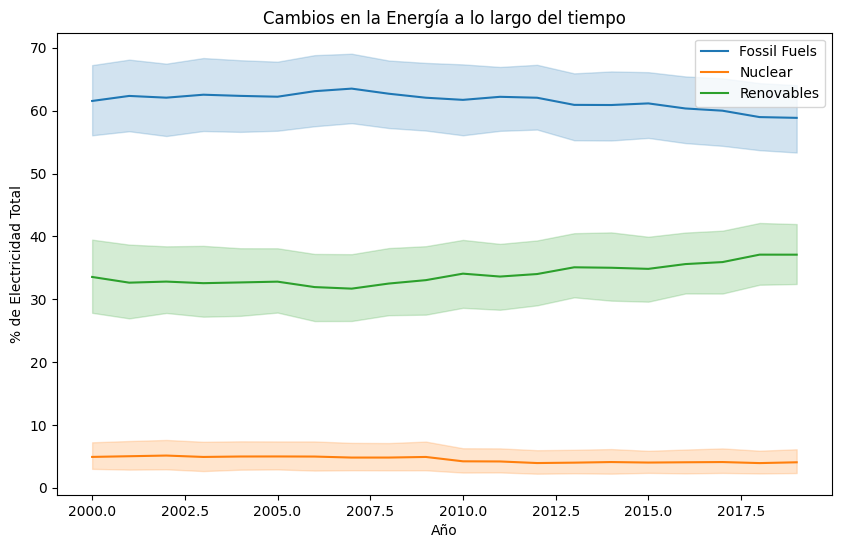

In [79]:
# Crear una nueva columna para la electricidad general generada
df['TotalElectricity'] = df['FossilFuelElectricity'] + df['NuclearElectricity'] + df['RenewableElectricity']

# Calcular el % de contribucion de cada tipo
df['Fossil Fuels (%)'] = (df['FossilFuelElectricity'] / df['TotalElectricity']) * 100
df['Nuclear (%)'] = (df['NuclearElectricity'] / df['TotalElectricity']) * 100
df['Renovables (%)'] = (df['RenewableElectricity'] / df['TotalElectricity']) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Fossil Fuels (%)', label='Fossil Fuels', data=df)
sns.lineplot(x='Year', y='Nuclear (%)', label='Nuclear', data=df)
sns.lineplot(x='Year', y='Renovables (%)', label='Renovables', data=df)
plt.title('Cambios en la Energía a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('% de Electricidad Total')
plt.legend()
plt.show()

El uso de combustibles fósiles (como el carbón, el petróleo y el gas natural) no es recomendable para el medio ambiente, y hay varias razones para esto.

Es cierto que, a nivel mundial, los combustibles fósiles todavía dominan la matriz energética global, representando entre el 60% y el 70% del uso de energía, mientras que las energías renovables han crecido en los últimos años, alcanzando entre el 30% y el 40% de la participación en la generación de electricidad. La energía nuclear representa una fracción mucho menor, cercana al 0% en muchas regiones, aunque en países como Francia tiene una mayor presencia.

Sin embargo, aunque el uso de combustibles fósiles siga siendo la norma, es importante comprender por qué esta transición hacia energías más limpias es urgente.

In [80]:
# Función para verificar si al menos el 80% de los años han mostrado un aumento en renovables
def has_increased_general(df_country):
    # Calcular la diferencia anual en el porcentaje de renovables
    df_country['diff'] = df_country['Renovables (%)'].diff()

    # Contar cuántos años tuvieron un aumento en renovables
    years_with_increase = (df_country['diff'] > 0).sum()

    # Verificar si al menos el 80% de los años tuvieron un incremento
    proportion_increase = years_with_increase / len(df_country)
    return proportion_increase >= 0.8

# Agrupar los datos por país (suponiendo que 'Entity' es el nombre del país)
transitioned_countries = []

for country, group in df.groupby('Entity'):
    if has_increased_general(group):
        transitioned_countries.append(country)

# Imprimir los países cuyo crecimiento ha sido en general ascendente en al menos el 80% de los años
print('Países que en general han aumentado su uso de energías renovables a lo largo del tiempo:')
for country in transitioned_countries:
    print(country)

# Contar cuántos países cumplen con la condición
print(f'\nNúmero total de países con un aumento de energías renovables en al menos el 80% de los años: {len(transitioned_countries)}')

Países que en general han aumentado su uso de energías renovables a lo largo del tiempo:
Belgium
Estonia
Ethiopia
Germany
United Kingdom

Número total de países con un aumento de energías renovables en al menos el 80% de los años: 5


In [81]:
# Función para verificar si al menos el 60% de los años han mostrado un aumento en renovables
def has_increased_general(df_country):
    # Calcular la diferencia anual en el porcentaje de renovables
    df_country['diff'] = df_country['Renovables (%)'].diff()

    # Contar cuántos años tuvieron un aumento en renovables
    years_with_increase = (df_country['diff'] > 0).sum()

    # Verificar si al menos el 60% de los años tuvieron un incremento
    proportion_increase = years_with_increase / len(df_country)
    return proportion_increase >= 0.6

# Agrupar los datos por país (suponiendo que 'Entity' es el nombre del país)
transitioned_countries = []

for country, group in df.groupby('Entity'):
    if has_increased_general(group):
        transitioned_countries.append(country)

# Imprimir los países cuyo crecimiento ha sido en general ascendente en al menos el 80% de los años
print('Países que en general han aumentado su uso de energías renovables a lo largo del tiempo:')
for country in transitioned_countries:
    print(country)

# Contar cuántos países cumplen con la condición
print(f'\nNúmero total de países con un aumento de energías renovables en al menos el 80% de los años: {len(transitioned_countries)}')

Países que en general han aumentado su uso de energías renovables a lo largo del tiempo:
Australia
Belarus
Belgium
Canada
China
Denmark
Estonia
Ethiopia
France
Germany
Greece
Hungary
Ireland
Israel
Jamaica
Japan
Lithuania
Luxembourg
Netherlands
New Zealand
Poland
South Africa
United Kingdom
United States
Uzbekistan

Número total de países con un aumento de energías renovables en al menos el 80% de los años: 25


### Países BRICS (sin RUsia porque no estaba en el df)

In [82]:
# Definir los países BRICS
paises_brics = ['Brazil', 'India', 'China', 'South Africa'] # Rusia no está en el dataset

# Filtrar los datos para los países BRICS
df_brics = df[df['Entity'].isin(paises_brics)]

# Estadísticas Descriptivas Básicas
df_brics.describe()

,Year,ElecAccess%population,Renewable%WFinalEnergy,FossilFuelElectricity,NuclearElectricity,RenewableElectricity,LowCarbonElec%,PrimaryEnergyconsumppercapita,EnergyuseperGDP,CO2Emissions,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude,TotalElectricity,Fossil Fuels (%),Nuclear (%),Renovables (%)
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.000000,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2009.500000,88.648376,27.969500,1057.232000,41.171125,359.209375,33.599254,16689.812377,6.689250,2.515413e+06,5.144453,5015.399867,5.654771e+06,2.915214,38.542626,1457.612500,66.400746,3.346413,30.252840
std,5.802662,12.210105,14.934003,1407.089578,62.668649,436.223220,31.652930,8529.044777,2.349705,3.278641e+06,3.500532,3507.599147,3.522317e+06,26.684665,60.319917,1852.954843,31.652929,1.445044,32.155753
min,2000.000000,55.800000,9.770000,28.870000,4.940000,1.190000,5.631863,3469.836400,3.740000,2.846600e+05,-3.545763,443.314194,1.219090e+06,-30.559482,-51.925280,196.470000,7.918547,1.179776,0.526721
25%,2004.750000,81.650000,12.240000,170.397500,13.160000,57.727500,13.692607,8684.153250,4.222500,4.079950e+05,2.886807,1597.675494,2.770220e+06,-18.316123,4.221809,304.080000,57.113578,2.357410,10.111074
50%,2009.500000,95.858262,31.020000,354.130000,15.220000,268.660000,18.753498,16619.263000,6.350000,7.247400e+05,5.259183,4670.454837,5.901516e+06,3.179340,50.950193,590.115000,81.246501,2.795322,16.667041
75%,2014.250000,99.015160,43.522500,1217.535000,38.002500,439.310000,42.886421,25251.777750,8.770000,2.678858e+06,7.860758,7731.195309,8.786068e+06,24.410678,85.271009,1505.337500,86.307392,4.425508,38.760142
max,2019.000000,100.000000,48.920000,5098.220000,348.700000,2014.570000,92.081450,28867.244000,10.850000,1.070722e+07,14.230861,13245.387370,9.596960e+06,35.861660,104.195397,7461.490000,94.368137,6.621876,90.130772


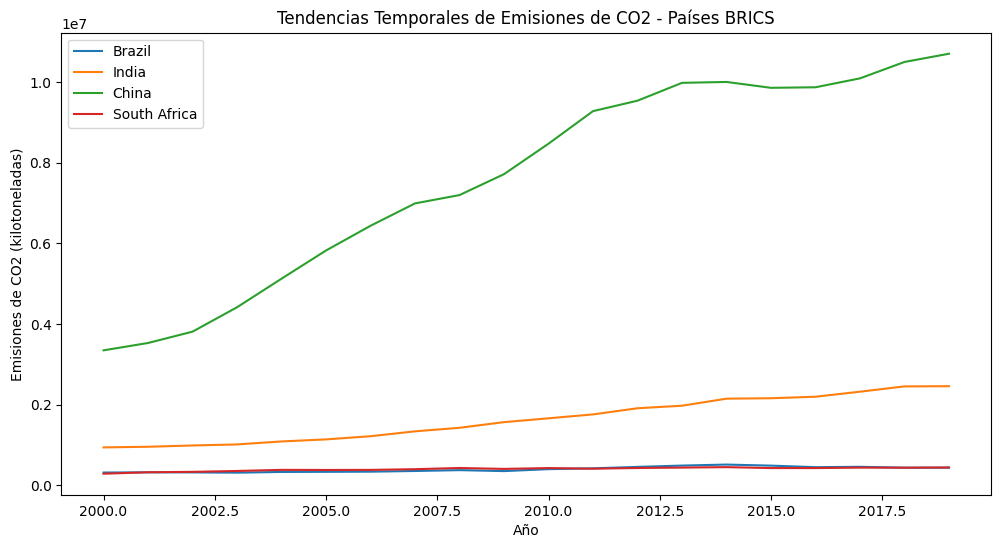

In [83]:
# Tendencias Temporales: Emisiones de CO2
plt.figure(figsize=(12, 6))
for pais in paises_brics:
    sns.lineplot(x='Year', y='CO2Emissions', data=df_brics[df_brics['Entity'] == pais], label=pais)

plt.title('Tendencias Temporales de Emisiones de CO2 - Países BRICS')
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2 (kilotoneladas)')
plt.legend()
plt.show()

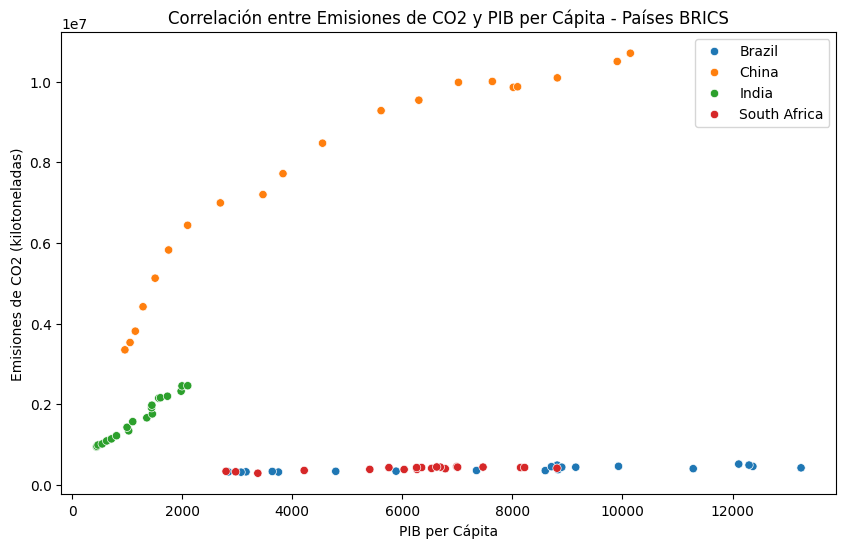

In [84]:
# Análisis de Correlación: Emisiones de CO2 vs. PIB per Cápita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='CO2Emissions', hue='Entity', data=df_brics)
plt.title('Correlación entre Emisiones de CO2 y PIB per Cápita - Países BRICS')
plt.xlabel('PIB per Cápita')
plt.ylabel('Emisiones de CO2 (kilotoneladas)')
plt.legend()
plt.show()

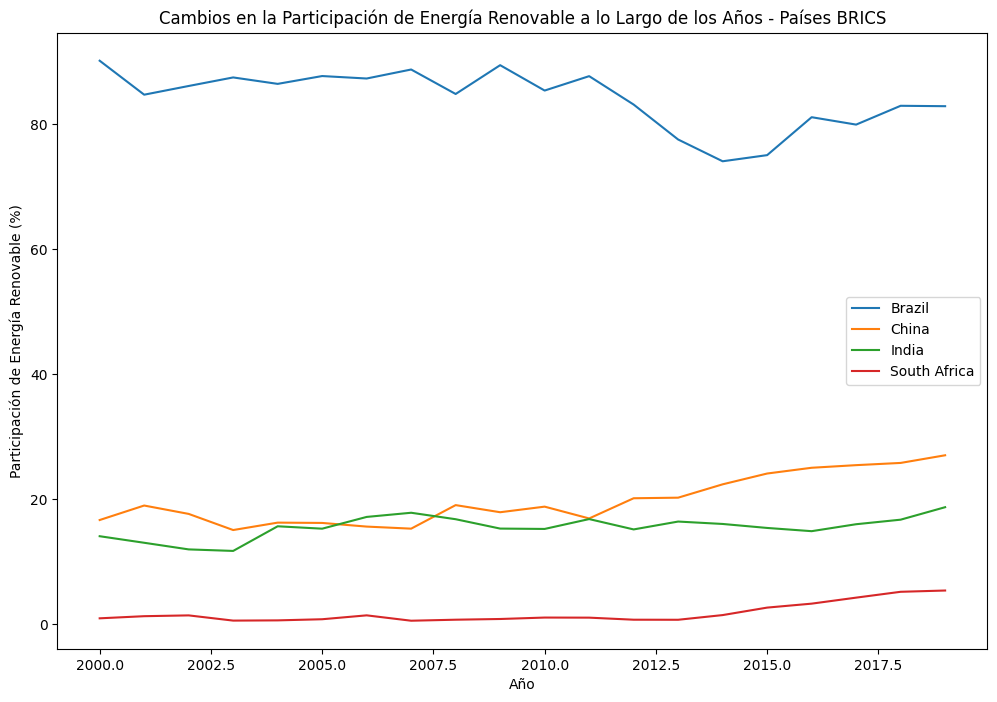

In [85]:
# Cambios en la Participación de Energía Renovable a lo Largo de los Años
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Renovables (%)', hue='Entity', data=df_brics)
plt.title('Cambios en la Participación de Energía Renovable a lo Largo de los Años - Países BRICS')
plt.xlabel('Año')
plt.ylabel('Participación de Energía Renovable (%)')
plt.legend()
plt.show()

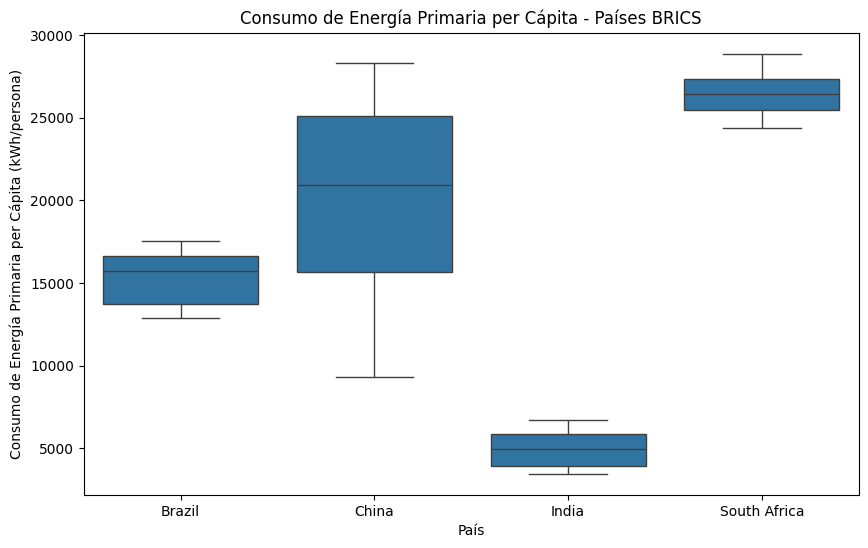

In [86]:
# Diagrama de Cajas: Consumo de Energía Primaria per Cápita
plt.figure(figsize=(10, 6))
sns.boxplot(x='Entity', y='PrimaryEnergyconsumppercapita', data=df_brics)
plt.title('Consumo de Energía Primaria per Cápita - Países BRICS')
plt.xlabel('País')
plt.ylabel('Consumo de Energía Primaria per Cápita (kWh/persona)')
plt.show()

### Top 10 países

In [87]:
import plotly.express as px

# Filtrar solo las columnas relevantes que fueron creadas previamente
df_filtered = df[['Year', 'Entity', 'CO2Emissions', 'PrimaryEnergyconsumppercapita',
                  'Renewable%WFinalEnergy', 'ElecAccess%population', 'gdp_per_capita',
                  'TotalElectricity', 'Fossil Fuels (%)', 'Nuclear (%)', 'Renovables (%)']]

# Calcular las emisiones totales de CO2 por país
total_co2_emissions = df_filtered.groupby('Entity')['CO2Emissions'].sum().sort_values(ascending=False)

# Obtener los 10 países con más emisiones de CO2
top_10_countries = total_co2_emissions.head(10).index.tolist()

# Filtrar el DataFrame para incluir solo los 10 países más emisores
df_top_10 = df_filtered[df_filtered['Entity'].isin(top_10_countries)]

# Crear las gráficas usando Plotly para las columnas relevantes
# Emisiones de CO2
fig_co2 = px.line(df_top_10, x='Year', y='CO2Emissions', color='Entity',
                  title='Emisiones de CO2 a lo largo del tiempo para los 10 países con más emisiones')

# Consumo de Energía Primaria per Cápita
fig_energy = px.line(df_top_10, x='Year', y='PrimaryEnergyconsumppercapita', color='Entity',
                     title='Consumo de Energía Primaria per Cápita a lo largo del tiempo para los 10 países más emisores')

# Participación de Energía Renovable
fig_renewable = px.line(df_top_10, x='Year', y='Renewable%WFinalEnergy', color='Entity',
                        title='Participación de Energía Renovable a lo largo del tiempo para los 10 países más emisores')

# Acceso a Electricidad
fig_electricity = px.line(df_top_10, x='Year', y='ElecAccess%population', color='Entity',
                          title='Acceso a Electricidad a lo largo del tiempo para los 10 países más emisores')

# PIB per Cápita
fig_gdp = px.line(df_top_10, x='Year', y='gdp_per_capita', color='Entity',
                  title='PIB per Cápita a lo largo del tiempo para los 10 países más emisores')

# Actualización de etiquetas y títulos en los ejes
fig_co2.update_layout(
    xaxis_title="Año",
    yaxis_title="Emisiones de CO2 (en toneladas)",
    legend_title="País",
    title="Emisiones de CO2 a lo largo del tiempo para los 10 países con más emisiones"
)

fig_energy.update_layout(
    xaxis_title="Año",
    yaxis_title="Consumo de Energía Primaria per Cápita (kWh/persona)",
    legend_title="País",
    title="Consumo de Energía Primaria per Cápita a lo largo del tiempo para los 10 países más emisores"
)

fig_renewable.update_layout(
    xaxis_title="Año",
    yaxis_title="Porcentaje de Energía Renovable (%)",
    legend_title="País",
    title="Participación de Energía Renovable a lo largo del tiempo para los 10 países más emisores"
)

fig_electricity.update_layout(
    xaxis_title="Año",
    yaxis_title="Acceso a Electricidad (%)",
    legend_title="País",
    title="Acceso a Electricidad a lo largo del tiempo para los 10 países más emisores"
)

fig_gdp.update_layout(
    xaxis_title="Año",
    yaxis_title="PIB per Cápita (USD)",
    legend_title="País",
    title="PIB per Cápita a lo largo del tiempo para los 10 países más emisores"
)

# Mostrar las gráficas
fig_co2.show()
fig_energy.show()
fig_renewable.show()
fig_electricity.show()
fig_gdp.show()

## China y EE.UU

In [88]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtrar los datos de China y Estados Unidos
df_china_usa = df[df['Entity'].isin(['China', 'United States'])]

# Agrupar por 'Year' y calcular la media para cada país
df_china_usa_grouped = df_china_usa.groupby(['Year', 'Entity']).agg({
    'FossilFuelElectricity': 'mean',
    'NuclearElectricity': 'mean',
    'RenewableElectricity': 'mean',
    'LowCarbonElec%': 'mean'
}).reset_index()

# Asignar colores fijos para China y EE.UU.
color_mapping = {
    'China': 'red',  # Color para China
    'United States': 'blue'  # Color para EE.UU.
}

# Crear una figura con subgráficas
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Electricidad de Combustibles Fósiles',
        'Electricidad Nuclear',
        'Electricidad Renovable',
        'Electricidad Baja en Carbono (%)'
    ),
    shared_xaxes=True
)

# Graficar para Combustibles Fósiles
fig.add_trace(go.Scatter(x=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'China']['Year'],
                         y=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'China']['FossilFuelElectricity'],
                         mode='lines+markers',
                         name='China',
                         line=dict(color=color_mapping['China']),
                         showlegend=True),  # Mostrar leyenda para China solo una vez
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'United States']['Year'],
                         y=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'United States']['FossilFuelElectricity'],
                         mode='lines+markers',
                         name='EE.UU.',
                         line=dict(color=color_mapping['United States']),
                         showlegend=False),  # No mostrar leyenda para EE.UU. en este gráfico
              row=1, col=1)

# Graficar para Electricidad Nuclear
fig.add_trace(go.Scatter(x=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'China']['Year'],
                         y=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'China']['NuclearElectricity'],
                         mode='lines+markers',
                         name='China',
                         line=dict(color=color_mapping['China']),
                         showlegend=False),  # No mostrar leyenda para China en este gráfico
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'United States']['Year'],
                         y=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'United States']['NuclearElectricity'],
                         mode='lines+markers',
                         name='EE.UU.',
                         line=dict(color=color_mapping['United States']),
                         showlegend=False),  # No mostrar leyenda para EE.UU. en este gráfico
              row=1, col=2)

# Graficar para Electricidad Renovable
fig.add_trace(go.Scatter(x=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'China']['Year'],
                         y=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'China']['RenewableElectricity'],
                         mode='lines+markers',
                         name='China',
                         line=dict(color=color_mapping['China']),
                         showlegend=False),  # No mostrar leyenda para China en este gráfico
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'United States']['Year'],
                         y=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'United States']['RenewableElectricity'],
                         mode='lines+markers',
                         name='EE.UU.',
                         line=dict(color=color_mapping['United States']),
                         showlegend=False),  # No mostrar leyenda para EE.UU. en este gráfico
              row=2, col=1)

# Graficar para Electricidad Baja en Carbono
fig.add_trace(go.Scatter(x=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'China']['Year'],
                         y=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'China']['LowCarbonElec%'],
                         mode='lines+markers',
                         name='China',
                         line=dict(color=color_mapping['China']),
                         showlegend=False),  # No mostrar leyenda para China en este gráfico
              row=2, col=2)

fig.add_trace(go.Scatter(x=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'United States']['Year'],
                         y=df_china_usa_grouped[df_china_usa_grouped['Entity'] == 'United States']['LowCarbonElec%'],
                         mode='lines+markers',
                         name='EE.UU.',
                         line=dict(color=color_mapping['United States']),
                         showlegend=False),  # No mostrar leyenda para EE.UU. en este gráfico
              row=2, col=2)

# Actualización de la disposición y etiquetas
fig.update_layout(
    title='Generación de Electricidad y Electricidad Baja en Carbono en China y EE.UU.',
    xaxis_title='Año',
    yaxis_title='Electricidad (TWh)',
    height=800,
    width=1000,
    showlegend=True
)

# Mostrar la gráfica
fig.show()


#Predicción de las emisiones de CO2 con redes neuronales

In [89]:
df.columns

Index(['Entity', 'Year', 'ElecAccess%population', 'Renewable%WFinalEnergy',
       'FossilFuelElectricity', 'NuclearElectricity', 'RenewableElectricity',
       'LowCarbonElec%', 'PrimaryEnergyconsumppercapita', 'EnergyuseperGDP',
       'CO2Emissions', 'gdp_growth', 'gdp_per_capita', 'Density (P/Km2)',
       'Land Area(Km2)', 'Latitude', 'Longitude', 'Continent',
       'TotalElectricity', 'Fossil Fuels (%)', 'Nuclear (%)',
       'Renovables (%)'],
      dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 21 to 3647
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Entity                         3040 non-null   object 
 1   Year                           3040 non-null   int64  
 2   ElecAccess%population          3040 non-null   float64
 3   Renewable%WFinalEnergy         3040 non-null   float64
 4   FossilFuelElectricity          3040 non-null   float64
 5   NuclearElectricity             3040 non-null   float64
 6   RenewableElectricity           3040 non-null   float64
 7   LowCarbonElec%                 3040 non-null   float64
 8   PrimaryEnergyconsumppercapita  3040 non-null   float64
 9   EnergyuseperGDP                3040 non-null   float64
 10  CO2Emissions                   3040 non-null   float64
 11  gdp_growth                     3040 non-null   float64
 12  gdp_per_capita                 3040 non-null   float

In [91]:
# Convertir la columna 'Density (P/Km2)' a tipo numérico
df["Density (P/Km2)"] = pd.to_numeric(df["Density (P/Km2)"], errors="coerce")
display(df.dtypes)

,0
Entity,object
Year,int64
ElecAccess%population,float64
Renewable%WFinalEnergy,float64
FossilFuelElectricity,float64
NuclearElectricity,float64
RenewableElectricity,float64
LowCarbonElec%,float64
PrimaryEnergyconsumppercapita,float64
EnergyuseperGDP,float64


## KNN Regressor

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import product

# ==========================
# 1. SELECCIONAR FEATURES Y TARGET
# ==========================
df = df.dropna()  # Eliminar filas con valores NaN

target = 'CO2Emissions'
features = ['ElecAccess%population', 'Renewable%WFinalEnergy', 'FossilFuelElectricity',
            'NuclearElectricity', 'RenewableElectricity', 'LowCarbonElec%',
            'PrimaryEnergyconsumppercapita', 'EnergyuseperGDP', 'gdp_growth',
            'gdp_per_capita', 'Density (P/Km2)']

X = df[features]
y = df[target]

# ==========================
# 2. DIVIDIR LOS DATOS EN TRAIN, VALIDATION Y TEST en 70,15,15% respectivament
# ==========================
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ==========================
# 3. NORMALIZAR LOS DATOS
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. DEFINIR HIPERPARÁMETROS A PROBAR
# ==========================
n_neighbors_values = [3, 5, 10, 15, 20]
weights_values = ['uniform', 'distance']
p_values = [1, 2]  # 1 = Manhattan, 2 = Euclidiana

# Lista para almacenar los resultados
results = []

# ==========================
# 5. ENTRENAR Y EVALUAR MODELOS KNN
# ==========================
for n_neighbors, weights, p in product(n_neighbors_values, weights_values, p_values):
    # Definir y entrenar el modelo con cada combinación de hiperparámetros
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, p=p)
    knn_model.fit(X_train_scaled, y_train)

    # Predicciones en entrenamiento y validación
    y_train_pred = knn_model.predict(X_train_scaled)
    y_val_pred = knn_model.predict(X_val_scaled)

    # Calcular métricas en train
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calcular métricas en validación
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)

    # Calcular la diferencia de R² entre train y validación
    r2_difference = np.abs(train_r2 - val_r2)

    # Guardar los resultados
    results.append({
        'n_neighbors': n_neighbors,
        'weights': weights,
        'p': p,
        'Train MAE': train_mae,
        'Validation MAE': val_mae,
        'Train MSE': train_mse,
        'Validation MSE': val_mse,
        'Train RMSE': train_rmse,
        'Validation RMSE': val_rmse,
        'Train R²': train_r2,
        'Validation R²': val_r2,
        'R² Difference': r2_difference
    })

# Convertir los resultados en DataFrame y ordenar por menor diferencia de R²
results_df = pd.DataFrame(results).sort_values(by='R² Difference', ascending=True)

# Mostrar las combinaciones ordenadas por menor sobreajuste (menor diferencia de R²)
print("\nResultados de la búsqueda de hiperparámetros ordenados por menor diferencia en R²:")
display(results_df)


Resultados de la búsqueda de hiperparámetros ordenados por menor diferencia en R²:


,n_neighbors,weights,p,Train MAE,Validation MAE,Train MSE,Validation MSE,Train RMSE,Validation RMSE,Train R²,Validation R²,R² Difference
0,3,uniform,1,5776.202000,7922.703050,9.437947e+08,8.087863e+08,30721.241354,28439.167622,0.998683,0.998115,0.000568
4,5,uniform,1,8057.372387,9972.393026,1.505266e+09,1.158214e+09,38797.758178,34032.550052,0.997899,0.997301,0.000599
1,3,uniform,2,7806.654998,10848.494328,1.095820e+09,1.027371e+09,33103.176975,32052.631812,0.998471,0.997605,0.000865
2,3,distance,1,0.000000,6643.058772,0.000000e+00,5.342050e+08,0.000000,23112.874272,1.000000,0.998755,0.001245
3,3,distance,2,0.000000,9083.614321,0.000000e+00,6.728612e+08,0.000000,25939.568947,1.000000,0.998432,0.001568
6,5,distance,1,0.000000,8121.828283,0.000000e+00,7.141166e+08,0.000000,26722.960263,1.000000,0.998336,0.001664
7,5,distance,2,0.000000,11352.547395,0.000000e+00,9.981824e+08,0.000000,31594.024855,1.000000,0.997673,0.002327
5,5,uniform,2,11477.298733,15039.421988,1.962455e+09,2.841354e+09,44299.607540,53304.353654,0.997261,0.993378,0.003883
10,10,distance,1,0.000000,13633.576566,0.000000e+00,1.977912e+09,0.000000,44473.723296,1.000000,0.995390,0.004610
8,10,uniform,1,18267.823204,21204.329424,6.417590e+09,5.932691e+09,80109.865091,77023.963764,0.991043,0.986172,0.004870



Mejores Hiperparámetros Encontrados:


,0
n_neighbors,3
weights,uniform
p,1
Train MAE,5776.202
Validation MAE,7922.70305
Train MSE,943794670.360435
Validation MSE,808786255.028817
Train RMSE,30721.241354
Validation RMSE,28439.167622
Train R²,0.998683



Evaluación final en el conjunto de prueba:
  - MAE: 5732.3112
  - MSE: 359663491.4900
  - RMSE: 18964.7961
  - R²: 0.9994


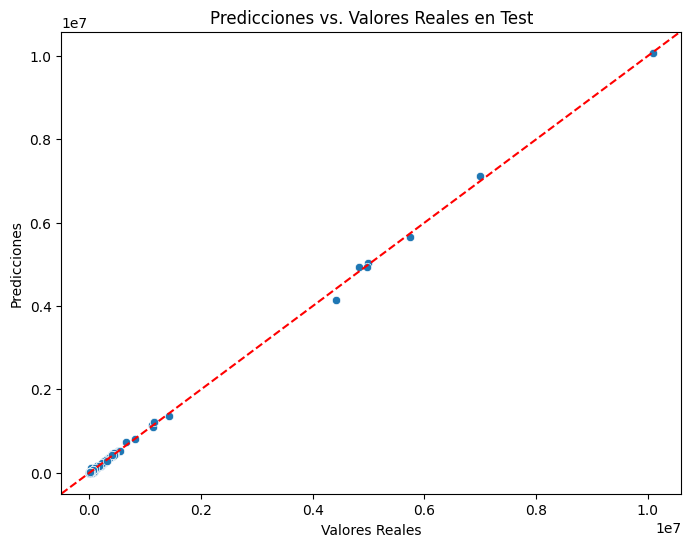

In [93]:
# ==========================
# 6. SELECCIONAR EL MEJOR MODELO
# ==========================
best_params = results_df.iloc[0]  # Tomamos la mejor combinación de hiperparámetros
print("\nMejores Hiperparámetros Encontrados:")
display(best_params)

# ==========================
# 7. ENTRENAR MODELO FINAL CON TRAIN + VALIDATION
# ==========================
X_final_train = np.vstack((X_train_scaled, X_val_scaled))
y_final_train = np.hstack((y_train, y_val))

final_knn = KNeighborsRegressor(
    n_neighbors=int(best_params['n_neighbors']),
    weights=best_params['weights'],
    p=int(best_params['p'])
)

final_knn.fit(X_final_train, y_final_train)

# ==========================
# 8. EVALUAR MODELO EN TEST
# ==========================
y_test_pred = final_knn.predict(X_test_scaled)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nEvaluación final en el conjunto de prueba:")
print(f"  - MAE: {test_mae:.4f}")
print(f"  - MSE: {test_mse:.4f}")
print(f"  - RMSE: {test_rmse:.4f}")
print(f"  - R²: {test_r2:.4f}")

# ==========================
# 9. VISUALIZAR RESULTADOS
# ==========================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales en Test")
plt.axline([0, 0], [1, 1], color='red', linestyle='dashed')
plt.show()

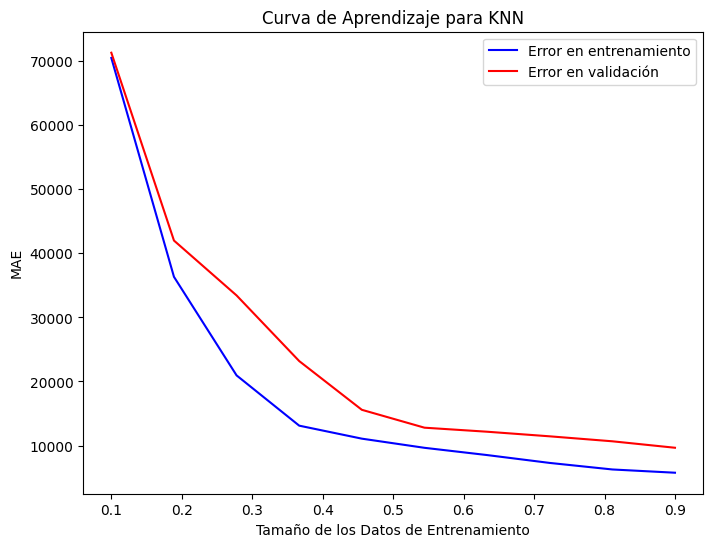

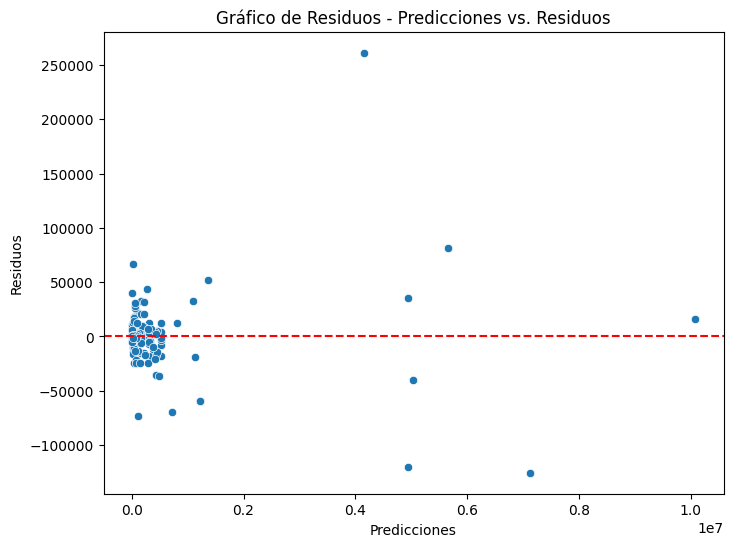

In [94]:
# Graficar la curva de aprendizaje
train_sizes = np.linspace(0.1, 0.9, 10)  # Porciones del conjunto de entrenamiento, excluyendo 1.0
train_errors, val_errors = [], []

for train_size in train_sizes:
    # Crear un subconjunto del conjunto de entrenamiento
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train_scaled, y_train, train_size=train_size, random_state=42)

    # Entrenar el modelo con el subconjunto
    final_knn.fit(X_train_subset, y_train_subset)

    # Calcular el error en entrenamiento y validación
    y_train_pred_subset = final_knn.predict(X_train_subset)
    y_val_pred = final_knn.predict(X_val_scaled)

    # Agregar los errores a las listas
    train_errors.append(mean_absolute_error(y_train_subset, y_train_pred_subset))
    val_errors.append(mean_absolute_error(y_val, y_val_pred))

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Error en entrenamiento', color='blue')
plt.plot(train_sizes, val_errors, label='Error en validación', color='red')
plt.xlabel('Tamaño de los Datos de Entrenamiento')
plt.ylabel('MAE')
plt.title('Curva de Aprendizaje para KNN')
plt.legend()
plt.show()

# Graficar los residuos
residuals = y_test - y_test_pred

# Graficar los residuos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos - Predicciones vs. Residuos")
plt.show()


Evaluación del modelo en entrenamiento y validación:
  - Train MAE: 0.0163 | Validation MAE: 0.0226
  - Train MSE: 0.0032 | Validation MSE: 0.0084
  - Train RMSE: 0.0566 | Validation RMSE: 0.0915
  - Train R²: 0.9970 | Validation R²: 0.9871

Evaluación final en el conjunto de prueba:
  - MAE: 0.0147
  - MSE: 0.0014
  - RMSE: 0.0368
  - R²: 0.9986


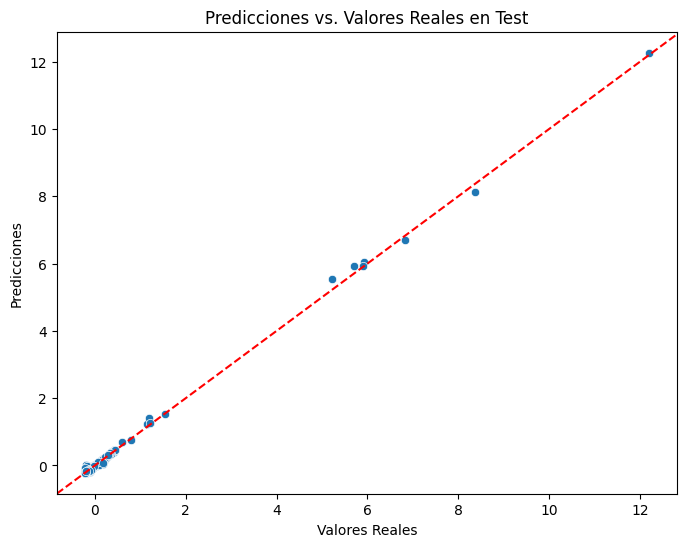

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==========================
# 1. SELECCIONAR FEATURES Y TARGET
# ==========================
df = df.dropna()  # Eliminar filas con valores NaN

target = 'CO2Emissions'
features = ['ElecAccess%population', 'Renewable%WFinalEnergy', 'FossilFuelElectricity',
            'NuclearElectricity', 'RenewableElectricity', 'LowCarbonElec%',
            'PrimaryEnergyconsumppercapita', 'EnergyuseperGDP', 'gdp_growth',
            'gdp_per_capita', 'Density (P/Km2)']

X = df[features]
y = df[target]

# ==========================
# 2. DIVIDIR LOS DATOS EN TRAIN, VALIDATION Y TEST (70%, 15%, 15%)
# ==========================
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ==========================
# 3. NORMALIZAR LOS DATOS
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. DEFINIR Y ENTRENAR EL MODELO CON K=6
# ==========================
knn_model = KNeighborsRegressor(n_neighbors=6, weights='uniform', p=2)  # p=2 para distancia Euclidiana
knn_model.fit(X_train_scaled, y_train)

# ==========================
# 5. EVALUAR EL MODELO EN TRAIN Y VALIDACIÓN
# ==========================
y_train_pred = knn_model.predict(X_train_scaled)
y_val_pred = knn_model.predict(X_val_scaled)

# Calcular métricas en train
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calcular métricas en validación
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print("\nEvaluación del modelo en entrenamiento y validación:")
print(f"  - Train MAE: {train_mae:.4f} | Validation MAE: {val_mae:.4f}")
print(f"  - Train MSE: {train_mse:.4f} | Validation MSE: {val_mse:.4f}")
print(f"  - Train RMSE: {train_rmse:.4f} | Validation RMSE: {val_rmse:.4f}")
print(f"  - Train R²: {train_r2:.4f} | Validation R²: {val_r2:.4f}")

# ==========================
# 6. ENTRENAR MODELO FINAL CON TRAIN + VALIDATION
# ==========================
X_final_train = np.vstack((X_train_scaled, X_val_scaled))
y_final_train = np.hstack((y_train, y_val))

final_knn = KNeighborsRegressor(n_neighbors=6, weights='uniform', p=2)
final_knn.fit(X_final_train, y_final_train)

# ==========================
# 7. EVALUAR MODELO EN TEST
# ==========================
y_test_pred = final_knn.predict(X_test_scaled)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nEvaluación final en el conjunto de prueba:")
print(f"  - MAE: {test_mae:.4f}")
print(f"  - MSE: {test_mse:.4f}")
print(f"  - RMSE: {test_rmse:.4f}")
print(f"  - R²: {test_r2:.4f}")

# ==========================
# 8. VISUALIZAR RESULTADOS
# ==========================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales en Test")
plt.axline([0, 0], [1, 1], color='red', linestyle='dashed')
plt.show()

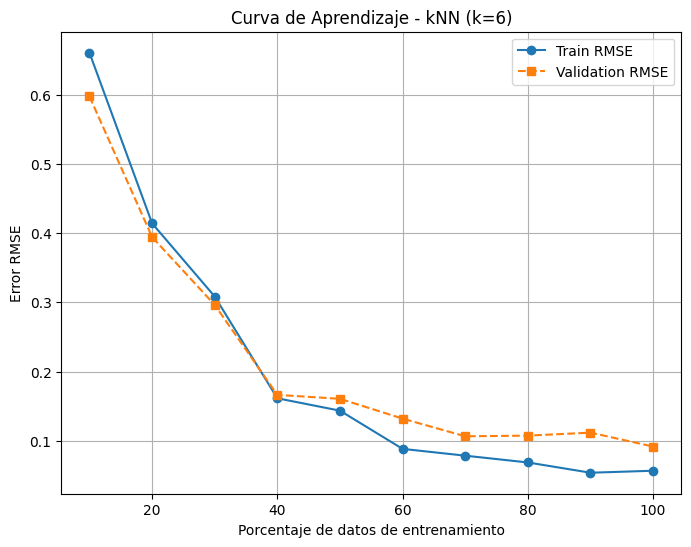

In [117]:
# ==========================
# 4. GRAFICAR CURVA DE APRENDIZAJE
# ==========================
train_sizes = np.linspace(0.1, 1.0, 10)  # Tamaños del conjunto de entrenamiento
train_errors = []
val_errors = []

knn_model = KNeighborsRegressor(n_neighbors=6, weights='uniform', p=2)

for size in train_sizes:
    # Tomamos una fracción del conjunto de entrenamiento
    X_train_subset = X_train_scaled[:int(size * len(X_train_scaled))]
    y_train_subset = y_train[:int(size * len(y_train))]

    # Entrenamos el modelo con el subconjunto
    knn_model.fit(X_train_subset, y_train_subset)

    # Evaluamos en training y validation
    y_train_pred = knn_model.predict(X_train_subset)
    y_val_pred = knn_model.predict(X_val_scaled)

    # RMSE en training y validation
    train_rmse = np.sqrt(mean_squared_error(y_train_subset, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    train_errors.append(train_rmse)
    val_errors.append(val_rmse)

# Graficamos la curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes * 100, train_errors, label="Train RMSE", marker='o', linestyle='-')
plt.plot(train_sizes * 100, val_errors, label="Validation RMSE", marker='s', linestyle='--')
plt.xlabel("Porcentaje de datos de entrenamiento")
plt.ylabel("Error RMSE")
plt.title("Curva de Aprendizaje - kNN (k=6)")
plt.legend()
plt.grid()
plt.show()

## PMC:

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import product

# ==========================
# 1. SELECCIONAR FEATURES Y TARGET
# ==========================
df = df.dropna()  # Eliminar filas con valores NaN

target = 'CO2Emissions'
features = ['ElecAccess%population', 'Renewable%WFinalEnergy', 'FossilFuelElectricity',
            'NuclearElectricity', 'RenewableElectricity', 'LowCarbonElec%',
            'PrimaryEnergyconsumppercapita', 'EnergyuseperGDP', 'gdp_growth',
            'gdp_per_capita', 'Density (P/Km2)']

X = df[features]
y = df[target]

# ==========================
# 2. DIVIDIR LOS DATOS EN TRAIN, VALIDATION Y TEST
# ==========================
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ==========================
# 3. NORMALIZAR LOS DATOS
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. DEFINIR HIPERPARÁMETROS A PROBAR
# ==========================
hidden_layer_sizes_values = [(32,), (64, 32), (128, 64, 32)]
activation_values = ['relu', 'tanh']
alpha_values = [0.0001, 0.001, 0.01]
learning_rate_values = ['constant', 'adaptive']

# Lista para almacenar los resultados
results = []

# ==========================
# 5. ENTRENAR Y EVALUAR MODELOS MLP
# ==========================
for hls, activation, alpha, lr in product(hidden_layer_sizes_values, activation_values, alpha_values, learning_rate_values):
    # Definir y entrenar el modelo con cada combinación de hiperparámetros
    mlp_model = MLPRegressor(hidden_layer_sizes=hls, activation=activation, alpha=alpha, learning_rate=lr,
                             solver='adam', max_iter=500, early_stopping=True, validation_fraction=0.1, random_state=42)
    mlp_model.fit(X_train_scaled, y_train)

    # Predicciones en entrenamiento y validación
    y_train_pred = mlp_model.predict(X_train_scaled)
    y_val_pred = mlp_model.predict(X_val_scaled)

    # Calcular métricas en train
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calcular métricas en validación
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)

    # Calcular la diferencia de R² entre train y validación
    r2_difference = np.abs(train_r2 - val_r2)

    # Guardar los resultados
    results.append({
        'Hidden Layers': hls,
        'Activation': activation,
        'Alpha': alpha,
        'Learning Rate': lr,
        'Train MAE': train_mae,
        'Validation MAE': val_mae,
        'Train MSE': train_mse,
        'Validation MSE': val_mse,
        'Train RMSE': train_rmse,
        'Validation RMSE': val_rmse,
        'Train R²': train_r2,
        'Validation R²': val_r2,
        'R² Difference': r2_difference
    })

# Convertir los resultados en DataFrame y ordenar por menor diferencia de R²
results_df = pd.DataFrame(results).sort_values(by='R² Difference', ascending=True)

# Mostrar las combinaciones ordenadas por menor sobreajuste (menor diferencia de R²)
print("\nResultados de la búsqueda de hiperparámetros ordenados por menor diferencia en R²:")
display(results_df)


Resultados de la búsqueda de hiperparámetros ordenados por menor diferencia en R²:


,Hidden Layers,Activation,Alpha,Learning Rate,Train MAE,Validation MAE,Train MSE,Validation MSE,Train RMSE,Validation RMSE,Train R²,Validation R²,R² Difference
26,"(128, 64, 32)",relu,0.0010,constant,0.019459,0.021531,0.001182,0.000977,0.034381,0.031253,0.998908,0.998493,0.000415
27,"(128, 64, 32)",relu,0.0010,adaptive,0.019459,0.021531,0.001182,0.000977,0.034381,0.031253,0.998908,0.998493,0.000415
24,"(128, 64, 32)",relu,0.0001,constant,0.018496,0.021452,0.000927,0.000963,0.030447,0.031030,0.999143,0.998514,0.000629
25,"(128, 64, 32)",relu,0.0001,adaptive,0.018496,0.021452,0.000927,0.000963,0.030447,0.031030,0.999143,0.998514,0.000629
29,"(128, 64, 32)",relu,0.0100,adaptive,0.020712,0.023703,0.001217,0.001169,0.034878,0.034188,0.998876,0.998197,0.000679
28,"(128, 64, 32)",relu,0.0100,constant,0.020712,0.023703,0.001217,0.001169,0.034878,0.034188,0.998876,0.998197,0.000679
23,"(64, 32)",tanh,0.0100,adaptive,0.035964,0.037836,0.005099,0.004005,0.071410,0.063281,0.995288,0.993821,0.001467
22,"(64, 32)",tanh,0.0100,constant,0.035964,0.037836,0.005099,0.004005,0.071410,0.063281,0.995288,0.993821,0.001467
14,"(64, 32)",relu,0.0010,constant,0.025841,0.030299,0.001533,0.001905,0.039156,0.043647,0.998583,0.997061,0.001523
15,"(64, 32)",relu,0.0010,adaptive,0.025841,0.030299,0.001533,0.001905,0.039156,0.043647,0.998583,0.997061,0.001523


In [103]:
# ==========================
# 6. SELECCIONAR EL MEJOR MODELO
# ==========================
best_params = results_df.iloc[0]  # Tomamos la mejor combinación de hiperparámetros
print("\nMejores Hiperparámetros Encontrados:")
display(best_params)

# ==========================
# 7. ENTRENAR MODELO FINAL CON TRAIN + VALIDATION
# ==========================
X_final_train = np.vstack((X_train_scaled, X_val_scaled))
y_final_train = np.hstack((y_train, y_val))

final_mlp = MLPRegressor(
    hidden_layer_sizes=best_params['Hidden Layers'],
    activation=best_params['Activation'],
    alpha=best_params['Alpha'],
    learning_rate=best_params['Learning Rate'],
    solver='adam',
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

final_mlp.fit(X_final_train, y_final_train)

# ==========================
# 8. EVALUAR MODELO EN TEST
# ==========================
y_test_pred = final_mlp.predict(X_test_scaled)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nEvaluación final en el conjunto de prueba:")
print(f"  - MAE: {test_mae:.4f}")
print(f"  - MSE: {test_mse:.4f}")
print(f"  - RMSE: {test_rmse:.4f}")
print(f"  - R²: {test_r2:.4f}")

# # ==========================
# # 9. VISUALIZAR RESULTADOS
# # ==========================
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=y_test, y=y_test_pred)
# plt.xlabel("Valores Reales")
# plt.ylabel("Predicciones")
# plt.title("Predicciones vs. Valores Reales en Test")
# plt.axline([0, 0], [1, 1], color='red', linestyle='dashed')
# plt.show()


Mejores Hiperparámetros Encontrados:


,26
Hidden Layers,"(128, 64, 32)"
Activation,relu
Alpha,0.001
Learning Rate,constant
Train MAE,0.019459
Validation MAE,0.021531
Train MSE,0.001182
Validation MSE,0.000977
Train RMSE,0.034381
Validation RMSE,0.031253



Evaluación final en el conjunto de prueba:
  - MAE: 0.0280
  - MSE: 0.0021
  - RMSE: 0.0459
  - R²: 0.9978


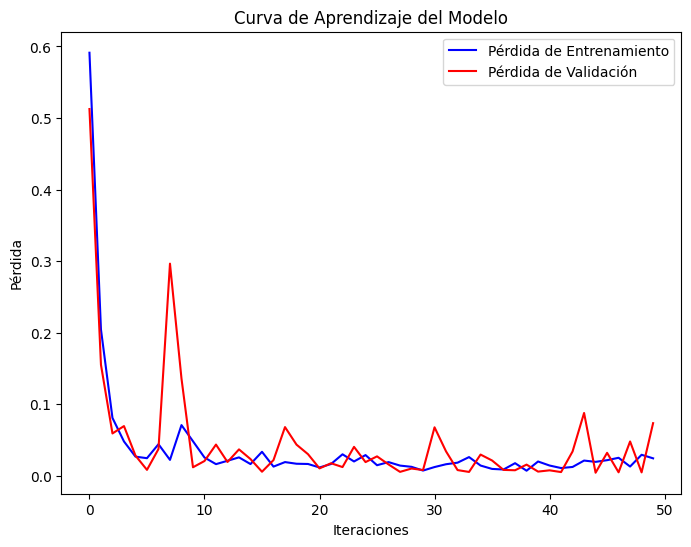

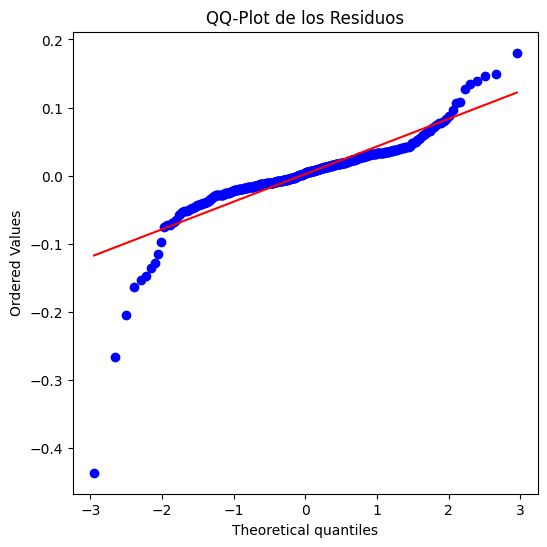

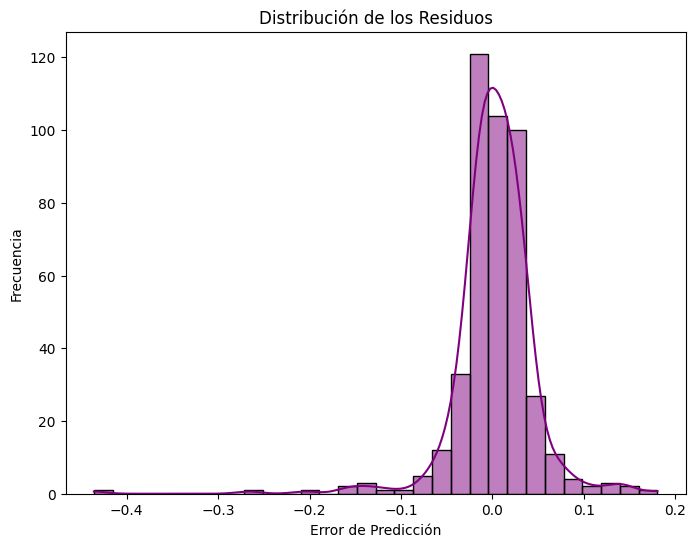

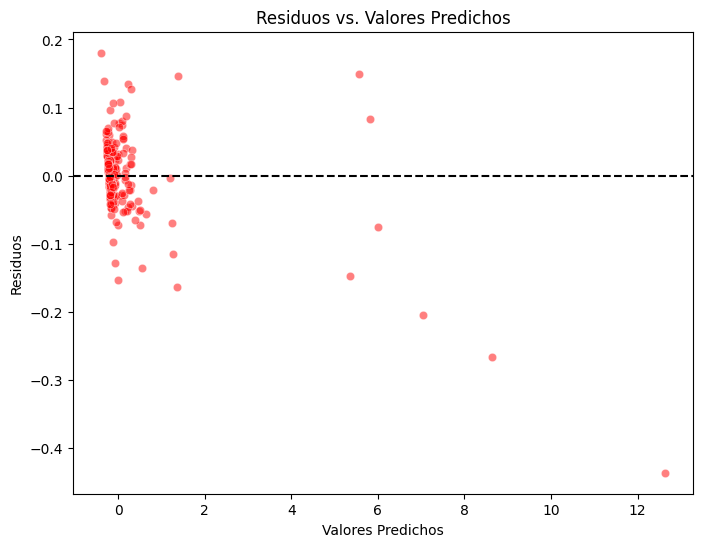

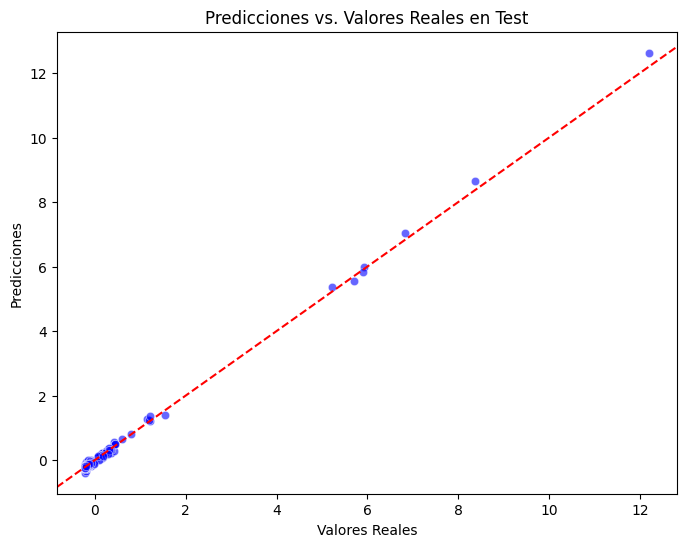

In [104]:
# ==========================
# 9. VISUALIZAR RESULTADOS
# ==========================

# 1. Curva de Aprendizaje
# plt.figure(figsize=(8, 6))
# plt.plot(final_mlp.loss_curve_, label="Loss Curve", color='blue')
# plt.xlabel("Iteraciones")
# plt.ylabel("Pérdida")
# plt.title("Curva de Aprendizaje del Modelo")
# plt.legend()
# plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de Validación', color='red')
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.title("Curva de Aprendizaje del Modelo")
plt.legend()
plt.show()

# 2. QQ-Plot (Para ver si los residuos siguen una distribución normal)
residuos = y_test - y_test_pred
plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot de los Residuos")
plt.show()

# 3. Histograma de los Residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, bins=30, color="purple")
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos")
plt.show()

# 4. Residuos vs. Valores Predichos (Para detectar heterocedasticidad)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuos, alpha=0.5, color="red")
plt.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Predichos")
plt.show()

# 5. Predicciones vs. Valores Reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", alpha=0.6)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales en Test")
plt.axline([0, 0], [1, 1], color='red', linestyle='dashed')
plt.show()

## PMC con PCA previamente

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad. Su objetivo es:

Transformar un conjunto de variables correlacionadas en un conjunto más pequeño de variables no correlacionadas llamadas componentes principales.
Capturar la mayor variabilidad posible en los datos con menos dimensiones.
Reducir el ruido eliminando variables menos relevantes.
En nuestro caso, podemos usar PCA para reducir la cantidad de variables de entrada antes de entrenar la red neuronal.

Si aplicamos PCA a todas las variables del df, estamos buscando una reducción de dimensionalidad automática sin hacer selección previa de features. Esto puede ser útil, pero también tiene implicaciones importantes.En este caso, asumimos que PCA encontrará automáticamente la mejor representación de los datos, lo cual puede ser bueno o malo dependiendo de las relaciones entre las variables. Sería esto un sesgo inductivo porque estamos asumiendo que todas las variables contienen información útil para predecir el target.
Un sesgo inductivo ocurre cuando imponemos una suposición sobre los datos antes de entrenar el modelo. Si hay variables altamente correlacionadas, PCA las combinará en menos dimensiones, lo que puede reducir la redundancia.

✅ Ventajas de tener variables dependientes en PCA:

✔️ Reduce la dimensionalidad sin perder demasiada información.

✔️ Ayuda a eliminar redundancias en los datos.

✔️ Puede mejorar la estabilidad del modelo y evitar el sobreajuste.

❌ Desventajas de tener variables dependientes en PCA:

❌ Puede mezclar información de distintas fuentes y hacer que el modelo sea
menos interpretable.

❌ Si eliminamos demasiadas dimensiones, podemos perder relaciones importantes.

❌ PCA no tiene en cuenta la relación con la variable objetivo (solo busca la mayor varianza).

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import product

# ==========================
# 1. SELECCIONAR FEATURES Y TARGET
# ==========================
df = df.dropna()  # Eliminar filas con valores NaN

target = 'CO2Emissions'
features = ['ElecAccess%population', 'Renewable%WFinalEnergy', 'FossilFuelElectricity',
            'NuclearElectricity', 'RenewableElectricity', 'LowCarbonElec%',
            'PrimaryEnergyconsumppercapita', 'EnergyuseperGDP', 'gdp_growth',
            'gdp_per_capita', 'Density (P/Km2)']

X = df[features]
y = df[target]

# ==========================
# 2. DIVIDIR LOS DATOS EN TRAIN, VALIDATION Y TEST
# ==========================
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ==========================
# 3. NORMALIZAR LOS DATOS
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ==========================
# 4. APLICAR PCA PARA REDUCCIÓN DE DIMENSIONALIDAD
# ==========================
pca = PCA(n_components=0.95)  # Retener 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Componentes principales seleccionados: {X_train_pca.shape[1]}")

# ==========================
# 5. DEFINIR HIPERPARÁMETROS A PROBAR
# ==========================
hidden_layer_sizes_values = [(32,), (64, 32), (128, 64, 32)]
activation_values = ['relu', 'tanh']
alpha_values = [0.0001, 0.001, 0.01]
learning_rate_values = ['constant', 'adaptive']

# Lista para almacenar los resultados
results = []

# ==========================
# 6. ENTRENAR Y EVALUAR MODELOS MLP CON PCA
# ==========================
for hls, activation, alpha, lr in product(hidden_layer_sizes_values, activation_values, alpha_values, learning_rate_values):
    # Definir y entrenar el modelo con cada combinación de hiperparámetros
    mlp_model = MLPRegressor(hidden_layer_sizes=hls, activation=activation, alpha=alpha, learning_rate=lr,
                             solver='adam', max_iter=500, early_stopping=True, validation_fraction=0.1, random_state=42)
    mlp_model.fit(X_train_pca, y_train)

    # Predicciones en entrenamiento y validación
    y_train_pred = mlp_model.predict(X_train_pca)
    y_val_pred = mlp_model.predict(X_val_pca)

    # Calcular métricas en train
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calcular métricas en validación
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, y_val_pred)

    # Calcular la diferencia de R² entre train y validación
    r2_difference = np.abs(train_r2 - val_r2)

    # Guardar los resultados
    results.append({
        'Hidden Layers': hls,
        'Activation': activation,
        'Alpha': alpha,
        'Learning Rate': lr,
        'Train MAE': train_mae,
        'Validation MAE': val_mae,
        'Train MSE': train_mse,
        'Validation MSE': val_mse,
        'Train RMSE': train_rmse,
        'Validation RMSE': val_rmse,
        'Train R²': train_r2,
        'Validation R²': val_r2,
        'R² Difference': r2_difference
    })

# Convertir los resultados en DataFrame y ordenar por menor diferencia de R²
results_df = pd.DataFrame(results).sort_values(by='R² Difference', ascending=True)

# Mostrar las combinaciones ordenadas por menor sobreajuste (menor diferencia de R²)
print("\nResultados de la búsqueda de hiperparámetros ordenados por menor diferencia en R²:")
display(results_df)

Componentes principales seleccionados: 8

Resultados de la búsqueda de hiperparámetros ordenados por menor diferencia en R²:


,Hidden Layers,Activation,Alpha,Learning Rate,Train MAE,Validation MAE,Train MSE,Validation MSE,Train RMSE,Validation RMSE,Train R²,Validation R²,R² Difference
17,"(64, 32)",relu,0.0100,adaptive,182326.700404,149417.649347,7.496917e+11,4.513654e+11,865847.389430,671837.368685,-0.046377,-0.052014,0.005637
16,"(64, 32)",relu,0.0100,constant,182326.700404,149417.649347,7.496917e+11,4.513654e+11,865847.389430,671837.368685,-0.046377,-0.052014,0.005637
15,"(64, 32)",relu,0.0010,adaptive,182326.700289,149417.649371,7.496917e+11,4.513655e+11,865847.390916,671837.370011,-0.046377,-0.052014,0.005637
14,"(64, 32)",relu,0.0010,constant,182326.700289,149417.649371,7.496917e+11,4.513655e+11,865847.390916,671837.370011,-0.046377,-0.052014,0.005637
13,"(64, 32)",relu,0.0001,adaptive,182326.701714,149417.651344,7.496917e+11,4.513655e+11,865847.398028,671837.375880,-0.046377,-0.052014,0.005637
12,"(64, 32)",relu,0.0001,constant,182326.701714,149417.651344,7.496917e+11,4.513655e+11,865847.398028,671837.375880,-0.046377,-0.052014,0.005637
31,"(128, 64, 32)",tanh,0.0001,adaptive,182333.577912,149424.452248,7.497089e+11,4.513758e+11,865857.325339,671845.054024,-0.046401,-0.052038,0.005637
30,"(128, 64, 32)",tanh,0.0001,constant,182333.577912,149424.452248,7.497089e+11,4.513758e+11,865857.325339,671845.054024,-0.046401,-0.052038,0.005637
33,"(128, 64, 32)",tanh,0.0010,adaptive,182333.577912,149424.452248,7.497089e+11,4.513758e+11,865857.325339,671845.054024,-0.046401,-0.052038,0.005637
32,"(128, 64, 32)",tanh,0.0010,constant,182333.577912,149424.452248,7.497089e+11,4.513758e+11,865857.325339,671845.054024,-0.046401,-0.052038,0.005637



Mejores Hiperparámetros Encontrados:
Hidden Layers                 (64, 32)
Activation                        relu
Alpha                             0.01
Learning Rate                 adaptive
Train MAE                182326.700404
Validation MAE           149417.649347
Train MSE          749691701782.676025
Validation MSE     451365449961.301941
Train RMSE                865847.38943
Validation RMSE          671837.368685
Train R²                     -0.046377
Validation R²                -0.052014
R² Difference                 0.005637
Name: 17, dtype: object

Evaluación final en el conjunto de prueba:
  - MAE: 170830.6544
  - MSE: 668936293524.4348
  - RMSE: 817885.2569
  - R²: -0.0456


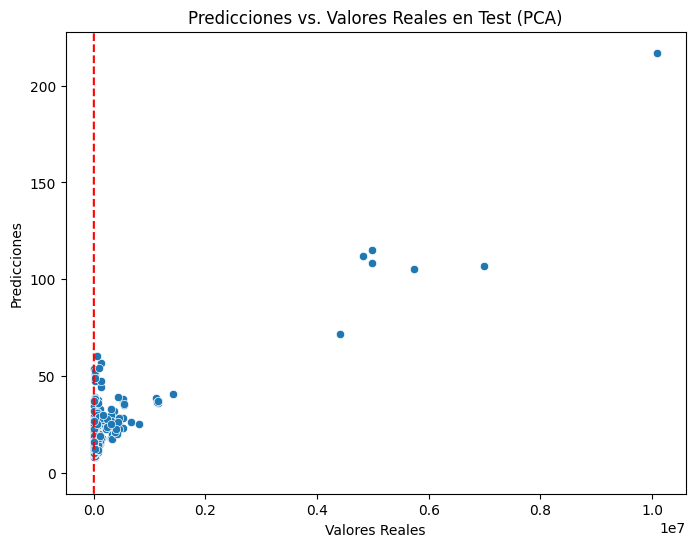

In [99]:
# ==========================
# 7. SELECCIONAR EL MEJOR MODELO
# ==========================
best_params = results_df.iloc[0]  # Tomamos la mejor combinación de hiperparámetros
print("\nMejores Hiperparámetros Encontrados:")
print(best_params)

# ==========================
# 8. ENTRENAR MODELO FINAL CON TRAIN + VALIDATION
# ==========================
X_final_train = np.vstack((X_train_pca, X_val_pca))
y_final_train = np.hstack((y_train, y_val))

final_mlp = MLPRegressor(
    hidden_layer_sizes=best_params['Hidden Layers'],
    activation=best_params['Activation'],
    alpha=best_params['Alpha'],
    learning_rate=best_params['Learning Rate'],
    solver='adam',
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

final_mlp.fit(X_final_train, y_final_train)

# ==========================
# 9. EVALUAR MODELO EN TEST
# ==========================
y_test_pred = final_mlp.predict(X_test_pca)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nEvaluación final en el conjunto de prueba:")
print(f"  - MAE: {test_mae:.4f}")
print(f"  - MSE: {test_mse:.4f}")
print(f"  - RMSE: {test_rmse:.4f}")
print(f"  - R²: {test_r2:.4f}")

# ==========================
# 10. VISUALIZAR RESULTADOS
# ==========================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales en Test (PCA)")
plt.axline([0, 0], [1, 1], color='red', linestyle='dashed')
plt.show()

## LSTM

e puede hacer regresión con LSTM cuando los datos tienen una estructura temporal. Como tienes datos de 2000 a 2019 por país, se puede tratar como un problema de series de tiempo donde el objetivo es predecir CO2Emissions en función de años anteriores.

In [ ]:
!pip install tensorflow

Train: (1522, 5, 16), Validation: (326, 5, 16), Test: (327, 5, 16)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 - 6s - 63ms/step - loss: 0.9486 - val_loss: 0.0089
Epoch 2/50
96/96 - 1s - 8ms/step - loss: 0.3224 - val_loss: 0.0057
Epoch 3/50
96/96 - 1s - 9ms/step - loss: 0.0828 - val_loss: 0.0062
Epoch 4/50
96/96 - 1s - 12ms/step - loss: 0.0664 - val_loss: 0.0057
Epoch 5/50
96/96 - 2s - 16ms/step - loss: 0.0408 - val_loss: 0.0103
Epoch 6/50
96/96 - 1s - 12ms/step - loss: 0.0459 - val_loss: 0.0055
Epoch 7/50
96/96 - 1s - 11ms/step - loss: 0.0266 - val_loss: 0.0035
Epoch 8/50
96/96 - 1s - 12ms/step - loss: 0.0382 - val_loss: 0.0030
Epoch 9/50
96/96 - 1s - 12ms/step - loss: 0.0315 - val_loss: 0.0049
Epoch 10/50
96/96 - 1s - 14ms/step - loss: 0.0279 - val_loss: 0.0032
Epoch 11/50
96/96 - 1s - 12ms/step - loss: 0.0275 - val_loss: 0.0035
Epoch 12/50
96/96 - 1s - 8ms/step - loss: 0.0191 - val_loss: 0.0017
Epoch 13/50
96/96 - 1s - 14ms/step - loss: 0.0194 - val_loss: 0.0028
Epoch 14/50
96/96 - 1s - 8ms/step - loss: 0.0187 - val_loss: 0.0021
Epoch 15/50
96/96 - 1s - 8ms/step - loss: 0.0230 - val_los

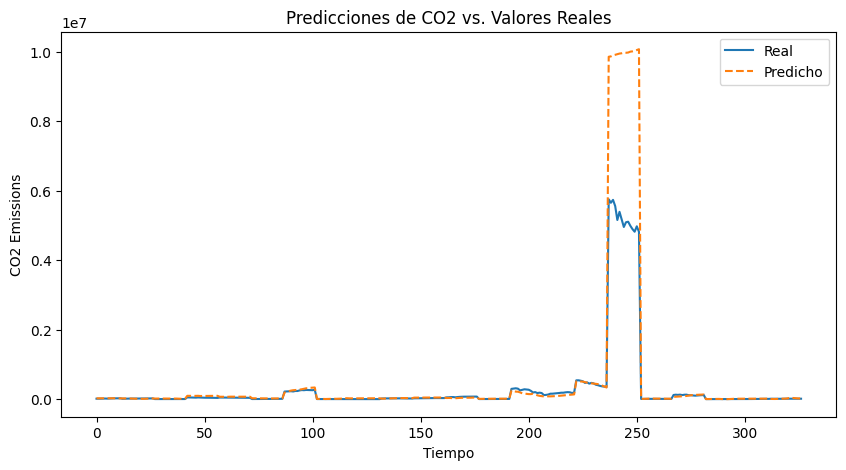

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==========================
# 1. CARGAR Y PREPROCESAR LOS DATOS
# ==========================
df = df.dropna()  # Eliminar valores NaN
df = df.sort_values(by=['Entity', 'Year'])  # Ordenar por País y Año

features = ['ElecAccess%population', 'Renewable%WFinalEnergy', 'FossilFuelElectricity',
            'NuclearElectricity', 'RenewableElectricity', 'LowCarbonElec%',
            'PrimaryEnergyconsumppercapita', 'EnergyuseperGDP', 'gdp_growth',
            'gdp_per_capita', 'Density (P/Km2)', 'TotalElectricity',
            'Fossil Fuels (%)', 'Nuclear (%)', 'Renovables (%)']

target = 'CO2Emissions'

# Escalar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

df[features] = scaler_X.fit_transform(df[features])
df[target] = scaler_y.fit_transform(df[[target]])

# ==========================
# 2. CREAR SERIES TEMPORALES PARA LSTM
# ==========================
def create_sequences(data, target_col, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])  # Secuencia de features
        y.append(data[i + seq_length, target_col])  # Target en el siguiente paso
    return np.array(X), np.array(y)

seq_length = 5  # Usamos los últimos 5 años para predecir el siguiente

X_list, y_list = [], []

for country in df['Entity'].unique():
    country_data = df[df['Entity'] == country][features + [target]].values  # Extraer datos del país
    X_country, y_country = create_sequences(country_data, target_col=-1, seq_length=seq_length)
    X_list.append(X_country)
    y_list.append(y_country)

X = np.vstack(X_list)
y = np.hstack(y_list)

# ==========================
# 3. DIVIDIR EN TRAIN, VALIDATION Y TEST
# ==========================
train_size = int(0.7 * X.shape[0])
val_size = int(0.15 * X.shape[0])

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# ==========================
# 4. CONSTRUIR EL MODELO LSTM
# ==========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Salida de regresión
])

model.compile(optimizer='adam', loss='mse')

# ==========================
# 5. ENTRENAR EL MODELO
# ==========================
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50, batch_size=16, verbose=2)

# ==========================
# 6. EVALUAR EL MODELO EN TEST
# ==========================
y_test_pred = model.predict(X_test)

# Desescalar valores
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_test_pred_real = scaler_y.inverse_transform(y_test_pred).flatten()

# Calcular métricas
mae = mean_absolute_error(y_test_real, y_test_pred_real)
mse = mean_squared_error(y_test_real, y_test_pred_real)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_test_pred_real)

print("\nEvaluación en Test:")
print(f"  - MAE: {mae:.4f}")
print(f"  - MSE: {mse:.4f}")
print(f"  - RMSE: {rmse:.4f}")
print(f"  - R²: {r2:.4f}")

# ==========================
# 7. VISUALIZAR PREDICCIONES
# ==========================
plt.figure(figsize=(10, 5))
plt.plot(y_test_real, label="Real")
plt.plot(y_test_pred_real, label="Predicho", linestyle="dashed")
plt.xlabel("Tiempo")
plt.ylabel("CO2 Emissions")
plt.title("Predicciones de CO2 vs. Valores Reales")
plt.legend()
plt.show()

Train: (1522, 5, 16), Validation: (326, 5, 16), Test: (327, 5, 16)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
96/96 - 6s - 58ms/step - loss: 0.5913 - val_loss: 0.5126
Epoch 2/50
96/96 - 1s - 8ms/step - loss: 0.2044 - val_loss: 0.1551
Epoch 3/50
96/96 - 1s - 13ms/step - loss: 0.0808 - val_loss: 0.0591
Epoch 4/50
96/96 - 1s - 13ms/step - loss: 0.0479 - val_loss: 0.0694
Epoch 5/50
96/96 - 1s - 8ms/step - loss: 0.0267 - val_loss: 0.0281
Epoch 6/50
96/96 - 1s - 9ms/step - loss: 0.0245 - val_loss: 0.0082
Epoch 7/50
96/96 - 2s - 16ms/step - loss: 0.0440 - val_loss: 0.0373
Epoch 8/50
96/96 - 1s - 10ms/step - loss: 0.0221 - val_loss: 0.2964
Epoch 9/50
96/96 - 1s - 7ms/step - loss: 0.0708 - val_loss: 0.1359
Epoch 10/50
96/96 - 1s - 8ms/step - loss: 0.0482 - val_loss: 0.0118
Epoch 11/50
96/96 - 2s - 17ms/step - loss: 0.0255 - val_loss: 0.0206
Epoch 12/50
96/96 - 1s - 14ms/step - loss: 0.0162 - val_loss: 0.0435
Epoch 13/50
96/96 - 1s - 9ms/step - loss: 0.0209 - val_loss: 0.0192
Epoch 14/50
96/96 - 1s - 13ms/step - loss: 0.0257 - val_loss: 0.0368
Epoch 15/50
96/96 - 1s - 9ms/step - loss: 0.0163 

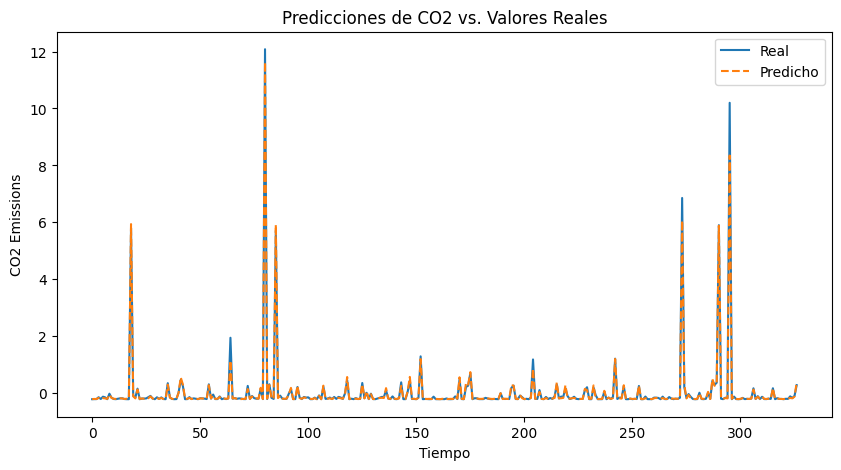

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import random
import os

# ==========================
# 1. ESTABLECER SEMILLA DE ALEATORIEDAD
# ==========================
SEED = 42  # Define la semilla que quieras usar

# Fijar semilla de Numpy, Random, TensorFlow y Python
np.random.seed(SEED)  # Para operaciones de aleatoriedad con Numpy
random.seed(SEED)  # Para operaciones de aleatoriedad con Python
tf.random.set_seed(SEED)  # Para la aleatoriedad de TensorFlow
os.environ['PYTHONHASHSEED'] = str(SEED)  # Asegura que Python no altere el hash

# ==========================
# 2. CARGAR Y PREPROCESAR LOS DATOS
# ==========================
df = df.dropna()  # Eliminar valores NaN
df = df.sort_values(by=['Entity', 'Year'])  # Ordenar por País y Año

features = ['ElecAccess%population', 'Renewable%WFinalEnergy', 'FossilFuelElectricity',
            'NuclearElectricity', 'RenewableElectricity', 'LowCarbonElec%',
            'PrimaryEnergyconsumppercapita', 'EnergyuseperGDP', 'gdp_growth',
            'gdp_per_capita', 'Density (P/Km2)', 'TotalElectricity',
            'Fossil Fuels (%)', 'Nuclear (%)', 'Renovables (%)']

target = 'CO2Emissions'

# Escalar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

df[features] = scaler_X.fit_transform(df[features])
df[target] = scaler_y.fit_transform(df[[target]])

# ==========================
# 3. CREAR SERIES TEMPORALES PARA LSTM
# ==========================
def create_sequences(data, target_col, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])  # Secuencia de features
        y.append(data[i + seq_length, target_col])  # Target en el siguiente paso
    return np.array(X), np.array(y)

seq_length = 5  # Usamos los últimos 5 años para predecir el siguiente

X_list, y_list = [], []

for country in df['Entity'].unique():
    country_data = df[df['Entity'] == country][features + [target]].values  # Extraer datos del país
    X_country, y_country = create_sequences(country_data, target_col=-1, seq_length=seq_length)
    X_list.append(X_country)
    y_list.append(y_country)

X = np.vstack(X_list)
y = np.hstack(y_list)

# ==========================
# 4. DIVIDIR EN TRAIN, VALIDATION Y TEST
# ==========================
train_size = int(0.7 * X.shape[0])
val_size = int(0.15 * X.shape[0])

# Para asegurar que la división de datos sea reproducible, usamos un valor de aleatoriedad fijo
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# ==========================
# 5. CONSTRUIR EL MODELO LSTM
# ==========================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Salida de regresión
])

model.compile(optimizer='adam', loss='mse')

# ==========================
# 6. ENTRENAR EL MODELO
# ==========================
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50, batch_size=16, verbose=2)

# ==========================
# 7. EVALUAR EL MODELO EN TEST
# ==========================
y_test_pred = model.predict(X_test)

# Desescalar valores
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_test_pred_real = scaler_y.inverse_transform(y_test_pred).flatten()

# Calcular métricas
mae = mean_absolute_error(y_test_real, y_test_pred_real)
mse = mean_squared_error(y_test_real, y_test_pred_real)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_test_pred_real)

print("\nEvaluación en Test:")
print(f"  - MAE: {mae:.4f}")
print(f"  - MSE: {mse:.4f}")
print(f"  - RMSE: {rmse:.4f}")
print(f"  - R²: {r2:.4f}")

# ==========================
# 8. VISUALIZAR PREDICCIONES
# ==========================
plt.figure(figsize=(10, 5))
plt.plot(y_test_real, label="Real")
plt.plot(y_test_pred_real, label="Predicho", linestyle="dashed")
plt.xlabel("Tiempo")
plt.ylabel("CO2 Emissions")
plt.title("Predicciones de CO2 vs. Valores Reales")
plt.legend()
plt.show()

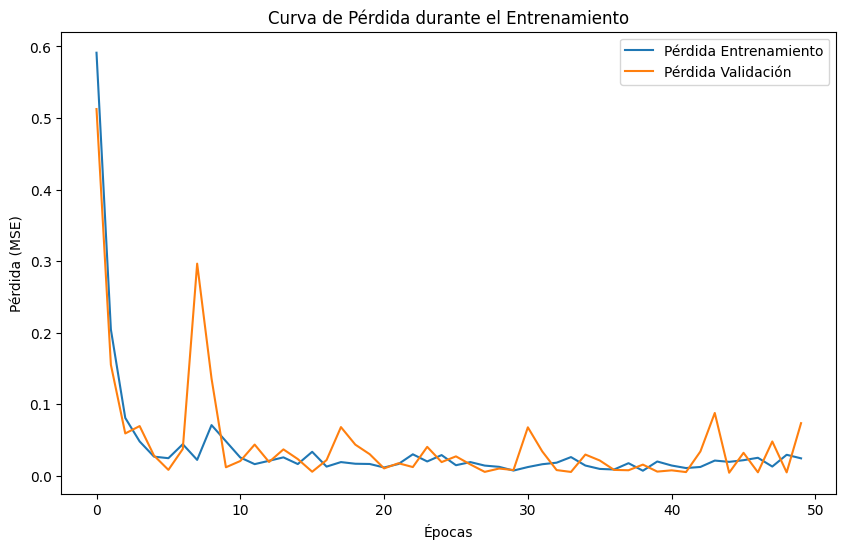

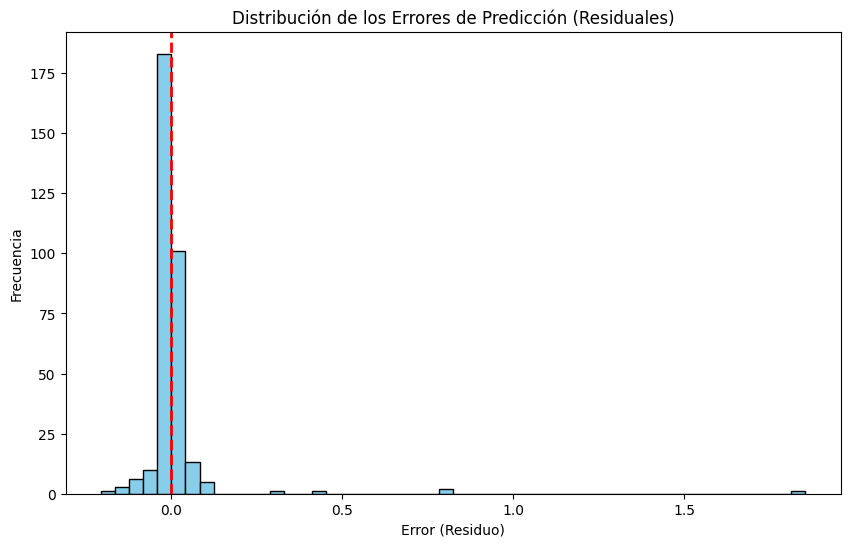

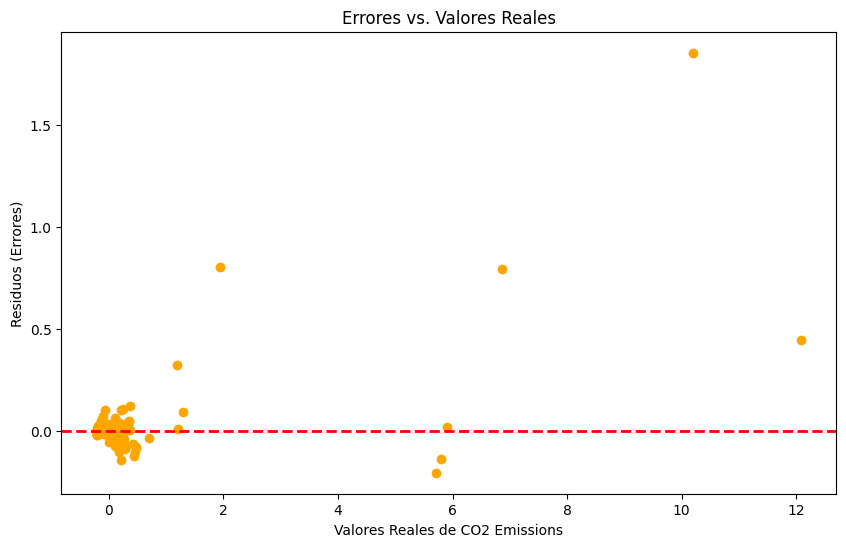

<ipython-input-107-cf2fb9a7e158>:46: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



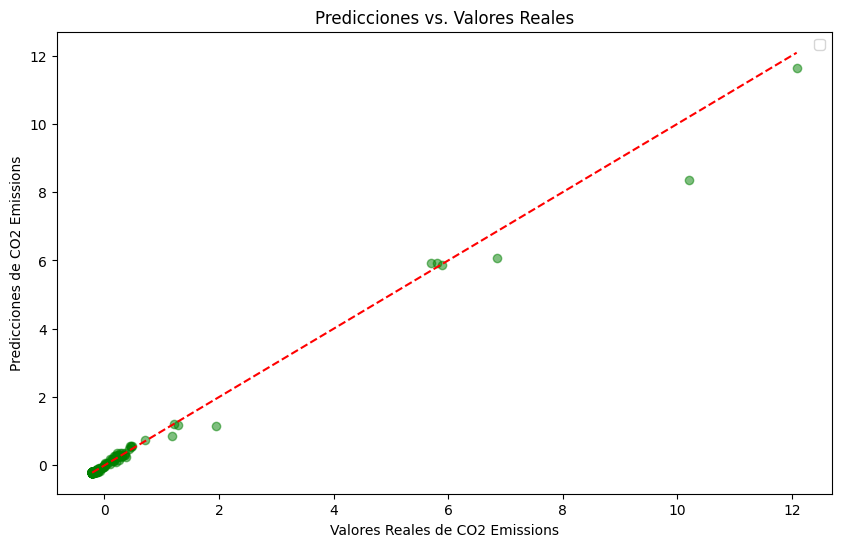

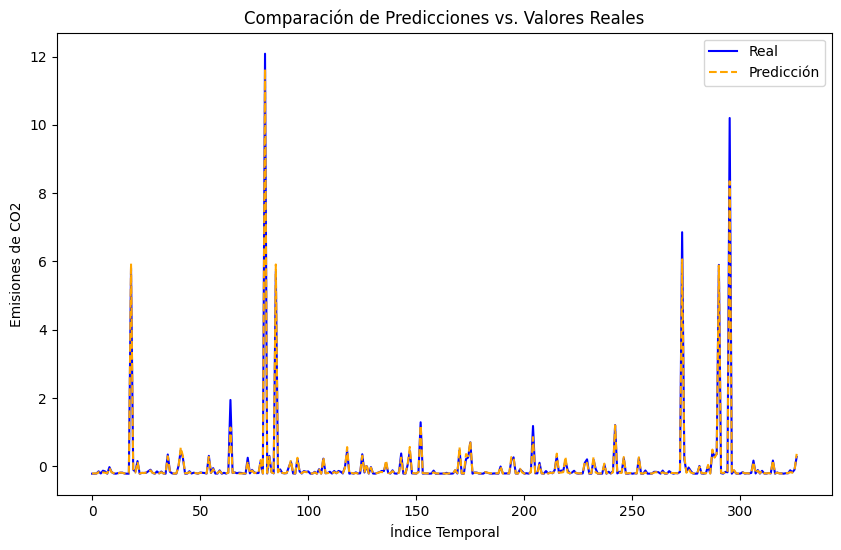

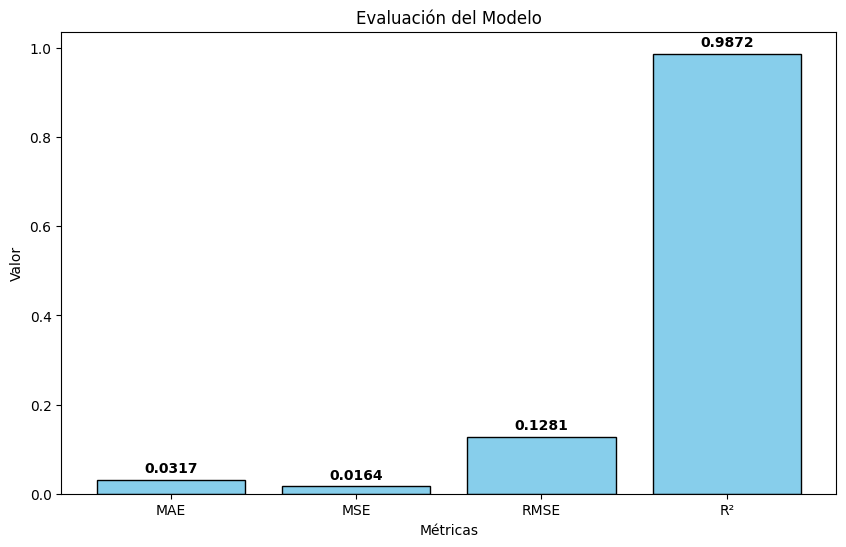

In [107]:
# ==========================
# 9. CURVA DE PERDIDA DURANTE EL ENTRENAMIENTO
# ==========================
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.title("Curva de Pérdida durante el Entrenamiento")
plt.legend()
plt.show()

# ==========================
# 10. DISTRIBUCIÓN DE LOS ERRORES (RESIDUALES)
# ==========================
residuals = y_test_real - y_test_pred_real

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Error (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores de Predicción (Residuales)")
plt.show()

# ==========================
# 11. ERRORES VS VALORES REALES
# ==========================
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, residuals, color='orange')
plt.axhline(y=0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Valores Reales de CO2 Emissions")
plt.ylabel("Residuos (Errores)")
plt.title("Errores vs. Valores Reales")
plt.show()

# ==========================
# 12. PREDICCIONES VS VALORES REALES (GRÁFICO DE DISPERSIÓN)
# ==========================
plt.figure(figsize=(10, 6))
plt.scatter(y_test_real, y_test_pred_real, color='green', alpha=0.5)
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], color='red', linestyle='--')
plt.xlabel("Valores Reales de CO2 Emissions")
plt.ylabel("Predicciones de CO2 Emissions")
plt.title("Predicciones vs. Valores Reales")
plt.legend()
plt.show()

# ==========================
# 13. COMPARACIÓN DE PREDICCIONES Y REALES (GRÁFICO DE LÍNEA)
# ==========================
plt.figure(figsize=(10, 6))
plt.plot(y_test_real, label="Real", color='blue')
plt.plot(y_test_pred_real, label="Predicción", color='orange', linestyle="dashed")
plt.xlabel("Índice Temporal")
plt.ylabel("Emisiones de CO2")
plt.title("Comparación de Predicciones vs. Valores Reales")
plt.legend()
plt.show()


# ==========================
# 14. GRÁFICO DE MÉTRICAS DE EVALUACIÓN
# ==========================
metrics = [mae, mse, rmse, r2]
metric_names = ['MAE', 'MSE', 'RMSE', 'R²']

plt.figure(figsize=(10, 6))
bars = plt.bar(metric_names, metrics, color='skyblue', edgecolor='black')

# Añadir las métricas numéricas sobre cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra (el valor)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4),
             ha='center', va='bottom', fontweight='bold', color='black')

plt.xlabel("Métricas")
plt.ylabel("Valor")
plt.title("Evaluación del Modelo")
plt.show()